<a href="https://colab.research.google.com/github/docum5/Time-series-forecasting-in-TensorFlow-Bitcoin-Price-Prediction-/blob/main/Time_series_forecasting_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting in TensorFlow (BitPredict 💰📈)



## Get the data

> Specifically, we're going to get the prices of Bitcoin from 04 Nov 2014 to 01 Feb 2022.

In [158]:
import pandas as pd

## Importing time series data with pandas

In [159]:
df = pd.read_csv('/content/drive/MyDrive/Time Series/Bitcoin Full Dataset 01-01-2022.csv',
                 parse_dates=['Date'],
                 index_col=['Date']) 

In [160]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-11-04,BTC,324.467934,323.826186,333.539527,323.106623
2014-11-05,BTC,328.644408,324.424164,330.671610,320.902900
2014-11-06,BTC,337.921358,328.653046,342.384170,328.597125
2014-11-07,BTC,348.992860,337.921358,352.585895,336.236830
2014-11-08,BTC,341.459753,348.992860,351.651854,340.196145


In [161]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2022-01-28,BTC,37197.821249,36828.097867,37242.500000,35550.000000
2022-01-29,BTC,37748.360000,37197.309145,38008.201832,36183.200000
2022-01-30,BTC,38176.097725,37748.360000,38716.700000,37353.500000
2022-01-31,BTC,37928.575488,38176.886567,38353.300000,37389.000000
2022-02-01,BTC,38499.876388,37925.166353,38741.679516,36681.035742


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2647 entries, 2014-11-04 to 2022-02-01
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2647 non-null   object 
 1   Closing Price (USD)  2647 non-null   float64
 2   24h Open (USD)       2647 non-null   float64
 3   24h High (USD)       2647 non-null   float64
 4   24h Low (USD)        2647 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.1+ KB


In [163]:
len(df)

2647

In [164]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices.head()

,Price
Date,
2014-11-04,324.467934
2014-11-05,328.644408
2014-11-06,337.921358
2014-11-07,348.992860
2014-11-08,341.459753


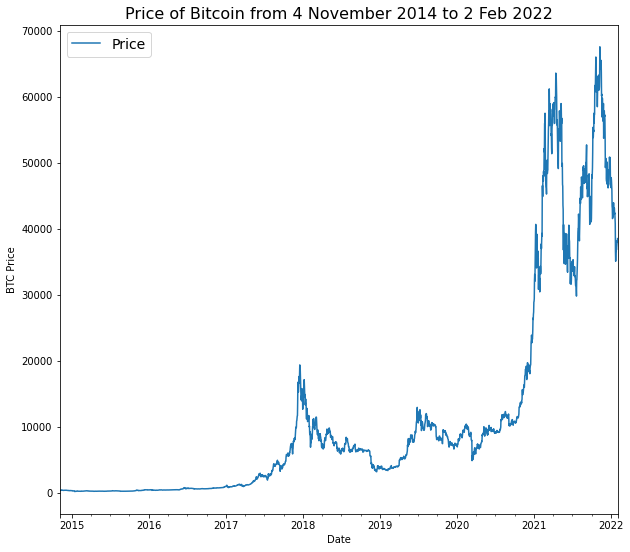

In [165]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,9))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 4 November 2014 to 2 Feb 2022', fontsize=16)
plt.legend(fontsize=14);

## Import Time Series data with Python's CSV Module

In [166]:
import csv 
from datetime import datetime

timesteps = [] # make an empty list, this is going to store our date 
btc_price = []
with open('/content/drive/MyDrive/Time Series/Bitcoin Full Dataset 01-01-2022.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',') # this will walk row by row each of the data
  next(csv_reader) # skip first line (the column title)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d')) #strptime() is another method available in DateTime which is used to format the time stamp which is in string format to date-time object.
    btc_price.append(float(line[2])) # get the closing price as a float


In [167]:
# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 11, 4, 0, 0),
  datetime.datetime(2014, 11, 5, 0, 0),
  datetime.datetime(2014, 11, 6, 0, 0),
  datetime.datetime(2014, 11, 7, 0, 0),
  datetime.datetime(2014, 11, 8, 0, 0),
  datetime.datetime(2014, 11, 9, 0, 0),
  datetime.datetime(2014, 11, 10, 0, 0),
  datetime.datetime(2014, 11, 11, 0, 0),
  datetime.datetime(2014, 11, 12, 0, 0),
  datetime.datetime(2014, 11, 13, 0, 0)],
 [324.467934,
  328.644408,
  337.921358,
  348.99286,
  341.459753,
  344.745289,
  357.239982,
  371.116917,
  366.664633,
  428.882925])

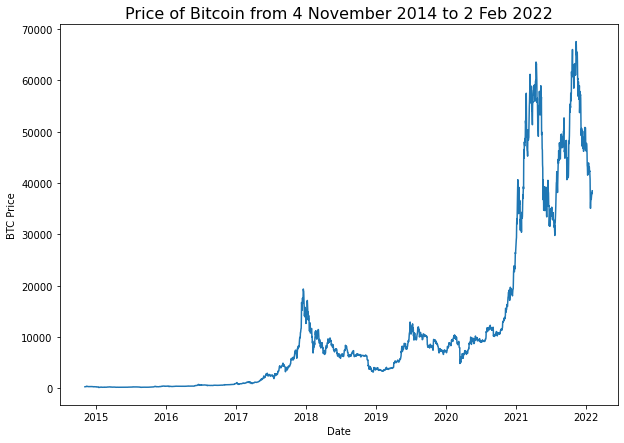

In [168]:
# Ploy from CSV 
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 4 November 2014 to 2 Feb 2022', fontsize=16)
plt.xlabel("Date");

## Format the data 

In [169]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-11-04T00:00:00.000000000', '2014-11-05T00:00:00.000000000',
        '2014-11-06T00:00:00.000000000', '2014-11-07T00:00:00.000000000',
        '2014-11-08T00:00:00.000000000', '2014-11-09T00:00:00.000000000',
        '2014-11-10T00:00:00.000000000', '2014-11-11T00:00:00.000000000',
        '2014-11-12T00:00:00.000000000', '2014-11-13T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([324.467934, 328.644408, 337.921358, 348.99286 , 341.459753,
        344.745289, 357.239982, 371.116917, 366.664633, 428.882925]))

## Create train & test sets for time series

In [170]:
# Create train and test split
split_size = int(0.8 * len(prices))

# Train data split
X_train , y_train = timesteps[:split_size], prices[:split_size]

#Test data split
X_test, y_test = timesteps[split_size:], prices[split_size:]

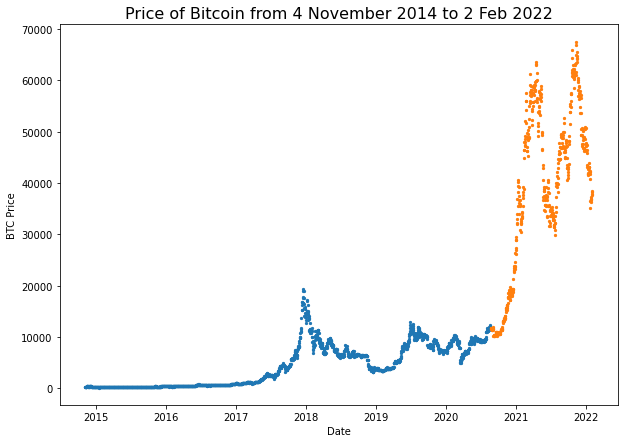

In [171]:
# Ploy from CSV 
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 4 November 2014 to 2 Feb 2022', fontsize=16)
plt.xlabel("Date");

## Craeting a Plotting Function 

In [172]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Parameters
  timesteps : array of timestep values
  values : array of value across time
  format : style of plot, default="."
  start : where to start the plot (setting a value will index from start of timesteps)
  end : where to end the plot 
  label : label to show on plot about values,default None
  """
  plt.plot(timesteps[start:end],values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


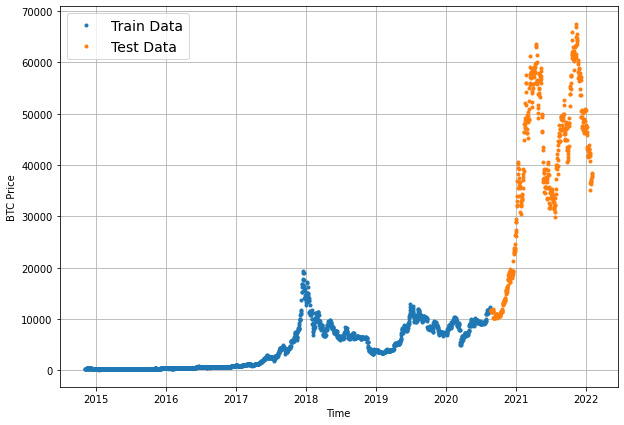

In [173]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label='Train Data')
plot_time_series(timesteps=X_test, values=y_test, label='Test Data')

# Modelling Experiments

## Model 0: Naive Model(Baseline)

> the prediction at timestep t(y hat) is equal to the value at timestep t-1 (previous timestep), this is the horizon of 1.


In [174]:
naive_forecast = y_test[:-1] #Naïve forecast equals every value excluding the last value

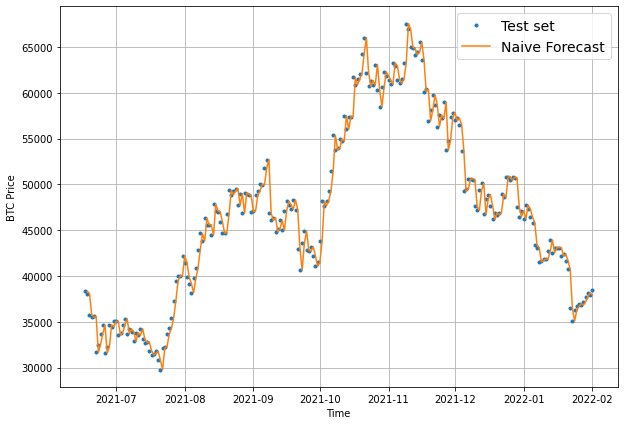

In [177]:
# Plot naive forecast
plt.figure(figsize=(10,7))
offset = 300 # offset the values by 300 timesteps 
#plot_time_series(timesteps=X_train, values=y_train, label='Train set')
plot_time_series(timesteps=X_test, values=y_test,start=offset,label='Test set')
plot_time_series(timesteps=X_test[1:], values=naive_forecast,start=offset, format='-',label='Naive Forecast') #x_test dimulai dari 1 karena kita menggunakan nilai kemaren untuk memprediksi nilai hari ini

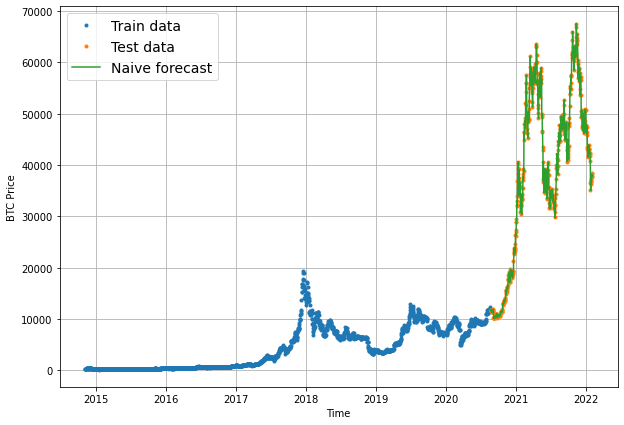

In [19]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

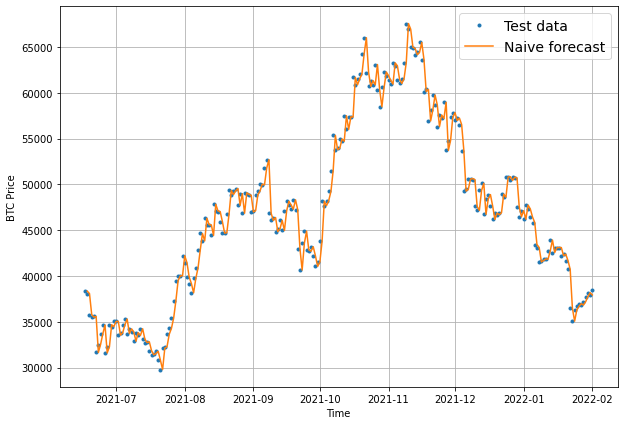

In [20]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

## Evaluating the time series model

In [21]:
import tensorflow as tf

In [22]:
# MASE Implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]- y_true[:-1]))

  return mae/mae_naive_no_season


In [23]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast).numpy()

0.9986782371670009

In [24]:
# Create a function to take in model predictions and truth values and return evaluation
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations), tf better if our data in float32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}


In [25]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 1127.0099,
 'mape': 2.8232758,
 'mase': 0.99867827,
 'mse': 2704483.5,
 'rmse': 1644.5315}

In [26]:
naive_forecast[-10:]

array([36485.436798, 35071.804446, 36285.926944, 36699.614179,
       36971.571269, 36827.674589, 37197.821249, 37748.36    ,
       38176.097725, 37928.575488])

> we can say on average the predictions off 1127,0099 from the actual price is.


In [27]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=38855.35640824906>

In [28]:
tf.reduce_min(y_test),tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=10123.3>,
 <tf.Tensor: shape=(), dtype=float64, numpy=67553.94893>)

## Format Our Data with Windowing

> we window our time series dataset to turn our data into a supervised learning problem. WINDOW= INPUT AND HORIZON = OUTPUT

In [29]:
HORIZON = 1 #predict 1 step at a time
WINDOW_SIZE = 7 #use a week worth of timesteps to predict the horizon  

In [30]:
# Created a func to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.
  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [31]:
tf.expand_dims(tf.range(8)+1,axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [32]:
# test the labeled func
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1,axis=0))

In [33]:
f'Window :{test_window} and the label:{test_label}'

'Window :[[1 2 3 4 5 6 7]] and the label:[[8]]'

> Write a function to take in an array and turn it into a window and horizon.

In [34]:
import numpy as np
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  #1. Create a window of specific window_size(add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
  #2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing,)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  #3. Index on the target array(time series)
  windowed_array = x[window_indexes]
  #4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

### make_windows function extend explanations

In [35]:
np.expand_dims(np.arange(8), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [36]:
len([0, 1, 2, 3, 4, 5, 6, 7])

8

In [37]:
np.arange(2)

array([0, 1])

In [38]:
np.expand_dims(np.arange(64), axis=0).T

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63]])

In [39]:
np.expand_dims(np.arange(8), axis=0) + np.expand_dims(np.arange(64), axis=0).T

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [10, 11, 12, 13, 14, 15, 16, 17],
       [11, 12, 13, 14, 15, 16, 17, 18],
       [12, 13, 14, 15, 16, 17, 18, 19],
       [13, 14, 15, 16, 17, 18, 19, 20],
       [14, 15, 16, 17, 18, 19, 20, 21],
       [15, 16, 17, 18, 19, 20, 21, 22],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [18, 19, 20, 21, 22, 23, 24, 25],
       [19, 20, 21, 22, 23, 24, 25, 26],
       [20, 21, 22, 23, 24, 25, 26, 27],
       [21, 22, 23, 24, 25, 26, 27, 28],
       [22, 23, 24, 25, 26, 27, 28, 29],
       [23, 24, 25, 26, 27, 28, 29, 30],
       [24, 25, 

In [40]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
full_windows, full_labels

(array([[  324.467934,   328.644408,   337.921358, ...,   341.459753,
           344.745289,   357.239982],
        [  328.644408,   337.921358,   348.99286 , ...,   344.745289,
           357.239982,   371.116917],
        [  337.921358,   348.99286 ,   341.459753, ...,   357.239982,
           371.116917,   366.664633],
        ...,
        [35071.804446, 36285.926944, 36699.614179, ..., 36827.674589,
         37197.821249, 37748.36    ],
        [36285.926944, 36699.614179, 36971.571269, ..., 37197.821249,
         37748.36    , 38176.097725],
        [36699.614179, 36971.571269, 36827.674589, ..., 37748.36    ,
         38176.097725, 37928.575488]]), array([[  371.116917],
        [  366.664633],
        [  428.882925],
        ...,
        [38176.097725],
        [37928.575488],
        [38499.876388]]))

In [41]:
# view the first 3 windowa/labels
for i in range(3):
  print(f'Window: {full_windows[i-3]} -> label {full_labels[i-3]}')

Window: [35071.804446 36285.926944 36699.614179 36971.571269 36827.674589
 37197.821249 37748.36    ] -> label [38176.097725]
Window: [36285.926944 36699.614179 36971.571269 36827.674589 37197.821249
 37748.36     38176.097725] -> label [37928.575488]
Window: [36699.614179 36971.571269 36827.674589 37197.821249 37748.36
 38176.097725 37928.575488] -> label [38499.876388]


## Turning windows into training and test sets 

In [42]:
#Make the train/test splits 
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows)* (1-test_split)) # this will default to 80% 20% split
  train_windows = windows[:split_size]
  test_windows = windows[split_size:]
  train_labels = labels[:split_size]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels


In [43]:
train_windows, test_windows, train_labels, test_labels= make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2112, 528, 2112, 528)

In [44]:
len(full_windows)*0.8

2112.0

## Make a modelling checkpoint callback

In [45]:
import os 
# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense model (window=7, horizon=1)

In [46]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct model 
model_1 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON, activation='linear') # linear activation = having no activation
], name='model_1_dense') # name our model so we can save it

# 2. Compile 
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])

# 3. Fit the model 
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
17/17 [==============================] - 6s 102ms/step - loss: 1107.7548 - mae: 1107.7548 - mse: 3668407.5000 - val_loss: 4826.2842 - val_mae: 4826.2842 - val_mse: 35360180.0000
Epoch 2/100
17/17 [==============================] - 1s 41ms/step - loss: 319.9966 - mae: 319.9966 - mse: 340985.2188 - val_loss: 1916.5450 - val_mae: 1916.5450 - val_mse: 7119445.0000
Epoch 3/100
17/17 [==============================] - 1s 39ms/step - loss: 239.8238 - mae: 239.8238 - mse: 226402.2500 - val_loss: 1875.8688 - val_mae: 1875.8688 - val_mse: 6825925.5000
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 221.9786 - mae: 221.9786 - mse: 200746.6406 - val_loss: 1876.5795 - val_mae: 1876.5795 - val_mse: 6863525.5000
Epoch 5/100
17/17 [==============================] - 1s 42ms/step - loss: 217.3131 - mae: 217.3131 - mse: 192224.8750 - val_loss: 1785.7637 - val_mae: 1785.7637 - val_mse: 5992753.5000
Epoch 6/100
17/17 [==============================] - 1s 41ms/step - los

In [47]:
model_1.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 1156.6426 - mae: 1156.6426 - mse: 2785008.0000


[1156.642578125, 1156.642578125, 2785008.0]

In [48]:
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 4ms/step - loss: 1140.2013 - mae: 1140.2013 - mse: 2764825.7500


[1140.2012939453125, 1140.2012939453125, 2764825.75]

In [49]:
naive_results

{'mae': 1127.0099,
 'mape': 2.8232758,
 'mase': 0.99867827,
 'mse': 2704483.5,
 'rmse': 1644.5315}

### Making forecast with a model 

In [50]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) #return 1d array of predictions

In [51]:
# Make prediction with model 1 
model_1_preds = make_preds(model=model_1, input_data=test_windows)
len(model_1_preds), model_1_preds[:5]

(528, <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([11607.195, 11621.655, 11655.736, 11766.209, 11391.638],
       dtype=float32)>)

In [52]:
# Evaluate preds 
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 1140.2012,
 'mape': 2.8472457,
 'mase': 1.0087067,
 'mse': 2764825.8,
 'rmse': 1662.7765}

In [53]:
naive_results

{'mae': 1127.0099,
 'mape': 2.8232758,
 'mase': 0.99867827,
 'mse': 2704483.5,
 'rmse': 1644.5315}

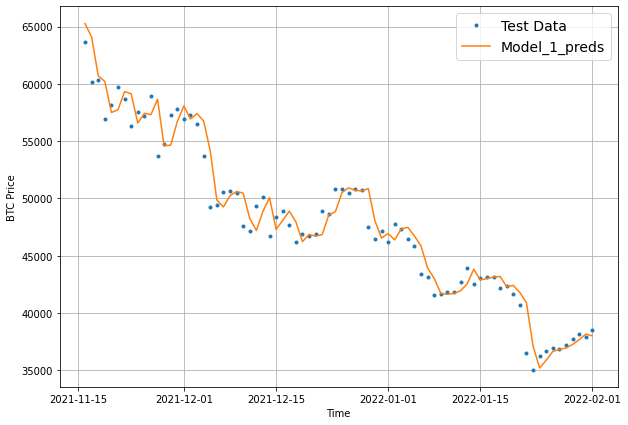

In [54]:
# Let's plot the model
offset = 450# to zoom in(tambah angkanya jika ingin zoom lebih)
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels, start=offset, label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_preds, start=offset, format='-',label='Model_1_preds') #values= prediksi dari model_1

## Model 2: Dense Model (Window size=30, horizon =1)

In [55]:
# Change data to be windowed format
full_windows2, full_labels2 = make_windows(prices,window_size=30,horizon=1)

In [56]:
# Turning windows data into train and test set
train_windows2, test_windows2, train_labels2, test_labels2=make_train_test_splits(full_windows2,full_labels2)

In [57]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct model 
model_2 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON, activation='linear') # linear activation = having no activation
], name='model_2_dense') # name our model so we can save it

# 2. Compile 
model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])

# 3. Fit the model 
model_2.fit(x=train_windows2,
            y=train_labels2,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows2, test_labels2),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
17/17 [==============================] - 1s 50ms/step - loss: 1449.6534 - mae: 1449.6534 - mse: 6448773.0000 - val_loss: 5883.6650 - val_mae: 5883.6650 - val_mse: 56920476.0000
Epoch 2/100
17/17 [==============================] - 1s 40ms/step - loss: 589.2914 - mae: 589.2914 - mse: 1134025.1250 - val_loss: 4002.2666 - val_mae: 4002.2666 - val_mse: 29016508.0000
Epoch 3/100
17/17 [==============================] - 1s 41ms/step - loss: 396.0172 - mae: 396.0172 - mse: 547100.0625 - val_loss: 2618.2212 - val_mae: 2618.2212 - val_mse: 12510717.0000
Epoch 4/100
17/17 [==============================] - 1s 42ms/step - loss: 294.5681 - mae: 294.5681 - mse: 325893.2500 - val_loss: 2296.6460 - val_mae: 2296.6460 - val_mse: 9829272.0000
Epoch 5/100
17/17 [==============================] - 1s 39ms/step - loss: 257.1170 - mae: 257.1170 - mse: 259489.7031 - val_loss: 2265.1394 - val_mae: 2265.1394 - val_mse: 9753294.0000
Epoch 6/100
17/17 [==============================] - 1s 41ms/step - 

In [58]:
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows2, test_labels2)

17/17 [==============================] - 0s 4ms/step - loss: 1233.3898 - mae: 1233.3898 - mse: 3079271.5000


[1233.3897705078125, 1233.3897705078125, 3079271.5]

In [59]:
# Making forecast
model_2_preds = make_preds(model=model_2,input_data=test_windows2)

In [60]:
# Evaluate Preds
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels2),
               y_pred=model_2_preds)
model_2_results

{'mae': 1233.3898,
 'mape': 3.0859113,
 'mase': 1.0841389,
 'mse': 3079271.8,
 'rmse': 1754.7855}

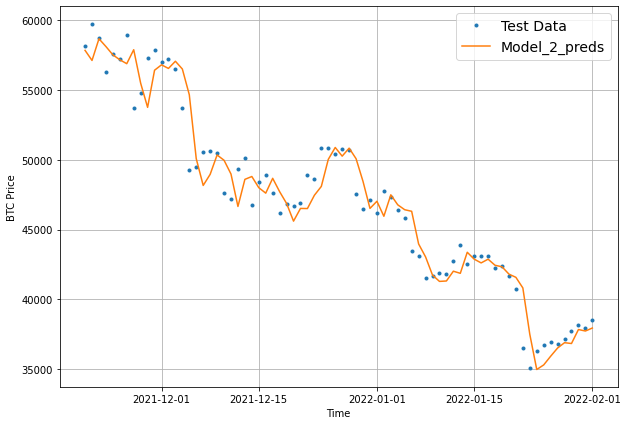

In [61]:
# Let's plot the model
offset = 450# to zoom in(tambah angkanya jika ingin zoom lebih)
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows2):],values=test_labels2, start=offset, label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows2):],values=model_2_preds, start=offset, format='-',label='Model_2_preds') #values= prediksi dari model_2

## Model 3: Dense (window=30, horizon=7)

In [62]:
# Make windows dataset
full_windows3, full_labels3 = make_windows(prices,window_size=30, horizon=7)
# Turning windows into train and test sets
train_windows3, test_windows3, train_labels3, test_labels3 = make_train_test_splits(full_windows3, full_labels3)

In [63]:
len(full_windows3), len(full_labels3)

(2611, 2611)

In [64]:
len(train_windows3), len(test_windows3), len(train_labels3), len(test_labels3) 

(2088, 523, 2088, 523)

In [65]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct model 
model_3 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(7, activation='linear') # linear activation = having no activation
], name='model_3_dense') # name our model so we can save it

# 2. Compile 
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])

# 3. Fit the model 
model_3.fit(x=train_windows3,
            y=train_labels3,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows3, test_labels3),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
17/17 [==============================] - 1s 51ms/step - loss: 2026.8726 - mae: 2026.8726 - mse: 14471435.0000 - val_loss: 6600.5718 - val_mae: 6600.5718 - val_mse: 82905224.0000
Epoch 2/100
17/17 [==============================] - 1s 40ms/step - loss: 749.3406 - mae: 749.3406 - mse: 1902688.7500 - val_loss: 5206.3130 - val_mae: 5206.3130 - val_mse: 48276100.0000
Epoch 3/100
17/17 [==============================] - 1s 40ms/step - loss: 588.1366 - mae: 588.1366 - mse: 1252328.5000 - val_loss: 4481.9150 - val_mae: 4481.9150 - val_mse: 36048412.0000
Epoch 4/100
17/17 [==============================] - 1s 38ms/step - loss: 525.7415 - mae: 525.7415 - mse: 1047165.6875 - val_loss: 4154.5742 - val_mae: 4154.5742 - val_mse: 31301896.0000
Epoch 5/100
17/17 [==============================] - 1s 40ms/step - loss: 482.9466 - mae: 482.9466 - mse: 893188.0625 - val_loss: 3778.4526 - val_mae: 3778.4526 - val_mse: 26448568.0000
Epoch 6/100
17/17 [==============================] - 1s 38ms/st

In [66]:
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')
model_3.evaluate(test_windows3, test_labels3)

17/17 [==============================] - 0s 4ms/step - loss: 2419.1069 - mae: 2419.1069 - mse: 11996798.0000


[2419.10693359375, 2419.10693359375, 11996798.0]

In [67]:
# Making Forecast
model_3_preds = make_preds(model=model_3, input_data=test_windows3)

In [68]:
# Evaluate Preds
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels3),
               y_pred=model_3_preds)

In [69]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([523, 7]), TensorShape([524]))

### Make our evaluation function work for larger horizons 

In [70]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([523, 7]), TensorShape([524]))

In [71]:
model_3_results['mae'].ndim,model_2_results['mae'].ndim,model_1_results['mae'].ndim

(1, 0, 0)

> modif our evaluate funct, so the funct still work for larger horizon. Like the example above, we see that the larger horizon results ndim>0

In [72]:
# Create a function to take in model predictions and truth values and return evaluation
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations), tf better if our data in float32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
    
  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}

In [73]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels3),
                                 y_pred =model_3_preds )
model_3_results

{'mae': 2419.1067,
 'mape': 6.0621853,
 'mase': 2.1254327,
 'mse': 11996798.0,
 'rmse': 2770.4795}

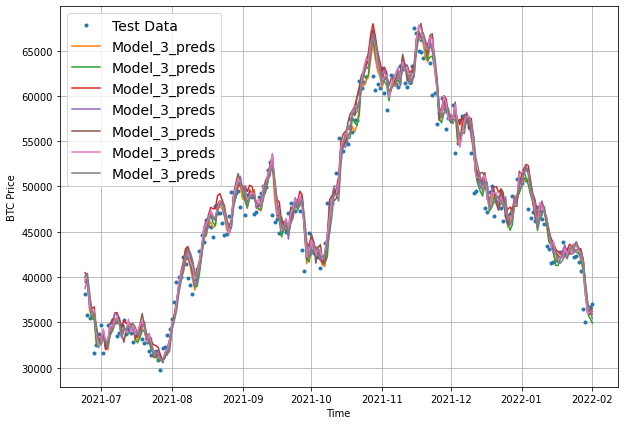

In [74]:
# Let's plot the model
offset = 300# to zoom in(tambah angkanya jika ingin zoom lebih)
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows3):],values=test_labels3[:,0], start=offset, label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows3):],values=model_3_preds, start=offset, format='-',label='Model_3_preds') #values= prediksi dari model_3

In [75]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[11782.554, 11895.849, 12032.005, 11850.502, 11639.34 , 11919.402,
        11988.966],
       [11713.355, 11590.395, 11815.04 , 11600.18 , 11924.702, 11839.654,
        11874.117],
       [11711.299, 11528.229, 11767.729, 11678.983, 11983.925, 11783.093,
        11660.878],
       [11856.664, 11909.541, 11963.721, 11954.831, 11958.986, 12010.181,
        11925.148],
       [11720.09 , 11726.562, 11843.692, 11807.369, 11883.798, 11765.013,
        11848.011]], dtype=float32)>

In [76]:
test_labels[:,0]

array([11674.5     , 11650.854674, 11759.941293, 11328.768901,
       11464.042672, 11327.9     , 11531.95454 , 11476.629603,
       11714.23514 , 11656.432744, 11923.96    , 11396.857033,
       10176.247978, 10464.      , 10161.158957, 10255.030965,
       10373.5     , 10123.3     , 10227.244121, 10347.067816,
       10394.814239, 10446.613916, 10329.405505, 10676.624682,
       10784.162077, 10950.87909 , 10942.731599, 10934.33551 ,
       11080.588884, 10919.855458, 10415.37887 , 10531.531053,
       10231.548608, 10740.01    , 10691.173933, 10731.960988,
       10776.1     , 10694.166355, 10840.319574, 10776.583205,
       10618.035721, 10573.5     , 10549.847509, 10674.834808,
       10795.      , 10602.750593, 10670.5     , 10929.284091,
       11060.5     , 11301.5     , 11375.652494, 11535.98    ,
       11426.687826, 11429.015304, 11504.324894, 11324.296966,
       11365.516058, 11509.226701, 11757.689871, 11922.278772,
       12813.      , 12991.159427, 12941.59    , 13126.

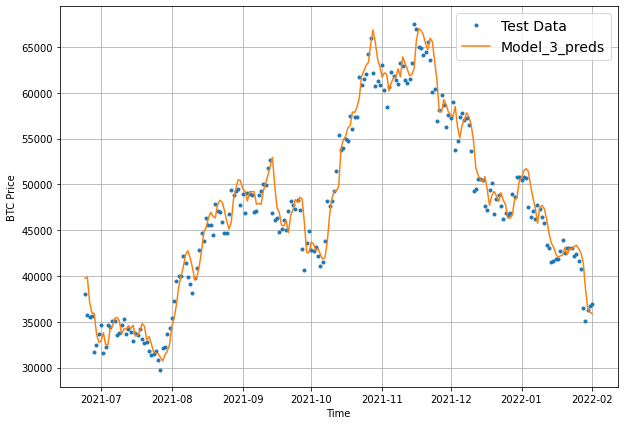

In [77]:
# Let's plot the model
offset = 300# to zoom in(tambah angkanya jika ingin zoom lebih)
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows3):],values=test_labels3[:,0], start=offset, label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows3):],values=tf.reduce_mean(model_3_preds,axis=1), start=offset, format='-',label='Model_3_preds') #values= prediksi dari model_3

# Which of our model is perfoming the best so far?


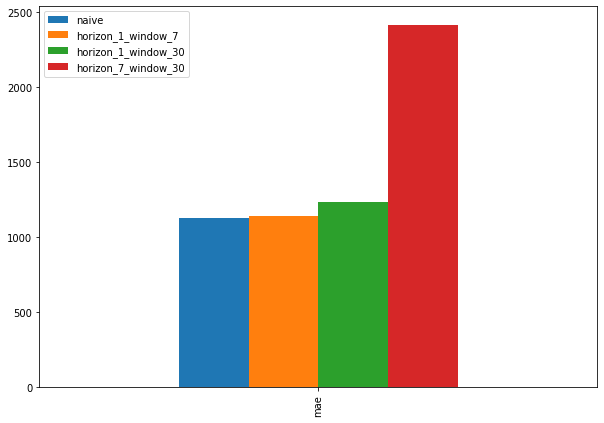

In [78]:
pd.DataFrame({'naive' : naive_results['mae'],
              'horizon_1_window_7' : model_1_results['mae'],
              'horizon_1_window_30' : model_2_results['mae'],
              'horizon_7_window_30' : model_3_results['mae']},
             index=['mae']).plot(figsize=(10,7),kind='bar');

## Model 4: Conv1D

In [79]:
HORIZON =1
WINDOW_SIZE = 7

In [80]:
# Make windows dataset
full_windows4, full_labels4 = make_windows(prices,window_size=7, horizon=1)
# Turning windows into train and test sets
train_windows4, test_windows4, train_labels4, test_labels4 = make_train_test_splits(full_windows4, full_labels4)

In [81]:
# Check data sample shapes
train_windows4[0] # returns (WINDOW_SIZE, )

array([324.467934, 328.644408, 337.921358, 348.99286 , 341.459753,
       344.745289, 357.239982])

> To use the Conv1D layer, we need an input shape of: (batch_size, timesteps, input_dim). However our data isn't in that shape yet.

In [82]:
train_windows4.shape

(2112, 7)

In [83]:
### Make a lambda layer to adjust the shape all of our train windows
expand_dims_layet = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for tomesteps

In [84]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                               layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
                                             layers.Dense(HORIZON)
], name='model_4_conv1D')

# Compile model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit 
model_4.fit(train_windows4,
            train_labels4,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows4, test_labels4),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
17/17 [==============================] - 9s 68ms/step - loss: 1792.9465 - val_loss: 3732.4851
Epoch 2/100
17/17 [==============================] - 1s 53ms/step - loss: 430.4558 - val_loss: 3161.2236
Epoch 3/100
17/17 [==============================] - 1s 69ms/step - loss: 270.7250 - val_loss: 1985.3037
Epoch 4/100
17/17 [==============================] - 1s 55ms/step - loss: 231.9535 - val_loss: 1912.7267
Epoch 5/100
17/17 [==============================] - 2s 109ms/step - loss: 227.9323 - val_loss: 1899.1770
Epoch 6/100
17/17 [==============================] - 2s 99ms/step - loss: 223.2860 - val_loss: 1849.8708
Epoch 7/100
17/17 [==============================] - 1s 56ms/step - loss: 219.7839 - val_loss: 1836.2521
Epoch 8/100
17/17 [==============================] - 1s 54ms/step - loss: 215.2278 - val_loss: 1798.6044
Epoch 9/100
17/17 [==============================] - 1s 54ms/step - loss: 211.6412 - val_loss: 1763.9659
Epoch 10/100
17/17 [==============================] -

In [85]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [86]:
#Evaluate model
model_4.evaluate(test_windows4, test_labels4)

17/17 [==============================] - 0s 4ms/step - loss: 1217.9758


1217.975830078125

In [87]:
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1D')
model_4.evaluate(test_windows4, test_labels4)

17/17 [==============================] - 0s 4ms/step - loss: 1144.0363


1144.0362548828125

In [88]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows4)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([11634.962, 11658.763, 11686.253, 11776.564, 11445.864, 11470.083,
       11382.854, 11522.919, 11512.793, 11710.801], dtype=float32)>

In [89]:
# Evaluate predictions 
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results 

{'mae': 1144.0363,
 'mape': 2.8511817,
 'mase': 1.0120995,
 'mse': 2792920.0,
 'rmse': 1671.2031}

In [90]:
model_1_results

{'mae': 1140.2012,
 'mape': 2.8472457,
 'mase': 1.0087067,
 'mse': 2764825.8,
 'rmse': 1662.7765}

## Model 5: RNN (LSTM)

> The tf.keras.layers.LSTM() layers take a tensor with [batch, timesteps,feature] dimensions

In [91]:
tf.random.set_seed(42)

# Build an LSTM model with the Functional API 
inputs = layers.Input(shape=(7))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
# x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(1)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output,name ="model_5_LSTM")

# cOMPILE 
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows4,
            train_labels4,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows4, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
13/17 [=====================>........] - ETA: 0s - loss: 3508.9399INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 4s 168ms/step - loss: 3328.7869 - val_loss: 19987.6758
Epoch 2/100
15/17 [=========================>....] - ETA: 0s - loss: 1459.0890INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 165ms/step - loss: 1362.8726 - val_loss: 2474.4690
Epoch 3/100
15/17 [=========================>....] - ETA: 0s - loss: 340.5791INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 148ms/step - loss: 327.8394 - val_loss: 1881.0664
Epoch 4/100
17/17 [==============================] - 0s 11ms/step - loss: 251.0981 - val_loss: 1997.4742
Epoch 5/100
17/17 [==============================] - 0s 11ms/step - loss: 233.4406 - val_loss: 1941.3962
Epoch 6/100
14/17 [=======================>......] - ETA: 0s - loss: 222.9093INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 147ms/step - loss: 223.5670 - val_loss: 1867.9330
Epoch 7/100
13/17 [=====================>........] - ETA: 0s - loss: 223.9942INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 168ms/step - loss: 219.5068 - val_loss: 1838.5748
Epoch 8/100
15/17 [=========================>....] - ETA: 0s - loss: 215.5896INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 148ms/step - loss: 218.6319 - val_loss: 1830.3090
Epoch 9/100
14/17 [=======================>......] - ETA: 0s - loss: 219.4140INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 154ms/step - loss: 217.8067 - val_loss: 1815.1075
Epoch 10/100
15/17 [=========================>....] - ETA: 0s - loss: 218.9774INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 154ms/step - loss: 215.4719 - val_loss: 1806.4757
Epoch 11/100
17/17 [==============================] - 0s 11ms/step - loss: 214.3190 - val_loss: 1846.7900
Epoch 12/100
13/17 [=====================>........] - ETA: 0s - loss: 221.2493INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 172ms/step - loss: 213.9746 - val_loss: 1803.0472
Epoch 13/100
14/17 [=======================>......] - ETA: 0s - loss: 211.0630INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 150ms/step - loss: 212.5395 - val_loss: 1774.8901
Epoch 14/100
17/17 [==============================] - 0s 10ms/step - loss: 210.9980 - val_loss: 1775.4252
Epoch 15/100
14/17 [=======================>......] - ETA: 0s - loss: 210.9427INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 148ms/step - loss: 211.6613 - val_loss: 1772.7952
Epoch 16/100
15/17 [=========================>....] - ETA: 0s - loss: 205.5340INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 171ms/step - loss: 206.5637 - val_loss: 1725.5219
Epoch 17/100
17/17 [==============================] - 0s 10ms/step - loss: 204.1569 - val_loss: 1738.9581
Epoch 18/100
15/17 [=========================>....] - ETA: 0s - loss: 203.4624INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 154ms/step - loss: 200.1130 - val_loss: 1714.1022
Epoch 19/100
14/17 [=======================>......] - ETA: 0s - loss: 201.2026INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 151ms/step - loss: 202.2764 - val_loss: 1695.0665
Epoch 20/100
15/17 [=========================>....] - ETA: 0s - loss: 196.4197INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 153ms/step - loss: 199.2521 - val_loss: 1669.1445
Epoch 21/100
17/17 [==============================] - 0s 10ms/step - loss: 197.0183 - val_loss: 1699.7311
Epoch 22/100
14/17 [=======================>......] - ETA: 0s - loss: 196.8579INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 170ms/step - loss: 194.7869 - val_loss: 1641.0916
Epoch 23/100
15/17 [=========================>....] - ETA: 0s - loss: 193.0969INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 152ms/step - loss: 193.3915 - val_loss: 1627.0471
Epoch 24/100
17/17 [==============================] - 0s 10ms/step - loss: 191.4276 - val_loss: 1647.5117
Epoch 25/100
17/17 [==============================] - 0s 11ms/step - loss: 191.0728 - val_loss: 1644.9390
Epoch 26/100
15/17 [=========================>....] - ETA: 0s - loss: 190.6662INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 147ms/step - loss: 186.5801 - val_loss: 1582.4365
Epoch 27/100
17/17 [==============================] - 0s 10ms/step - loss: 185.0008 - val_loss: 1588.2217
Epoch 28/100
14/17 [=======================>......] - ETA: 0s - loss: 184.8367INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 170ms/step - loss: 184.3031 - val_loss: 1540.0261
Epoch 29/100
15/17 [=========================>....] - ETA: 0s - loss: 179.1186INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 151ms/step - loss: 180.4493 - val_loss: 1528.0391
Epoch 30/100
14/17 [=======================>......] - ETA: 0s - loss: 178.1301INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 151ms/step - loss: 178.1851 - val_loss: 1516.5322
Epoch 31/100
15/17 [=========================>....] - ETA: 0s - loss: 174.7022INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 154ms/step - loss: 177.7514 - val_loss: 1494.5636
Epoch 32/100
17/17 [==============================] - 0s 11ms/step - loss: 174.0344 - val_loss: 1501.6230
Epoch 33/100
14/17 [=======================>......] - ETA: 0s - loss: 167.0131INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 173ms/step - loss: 172.8489 - val_loss: 1461.8595
Epoch 34/100
17/17 [==============================] - 0s 11ms/step - loss: 171.0398 - val_loss: 1515.2550
Epoch 35/100
17/17 [==============================] - 0s 11ms/step - loss: 170.9075 - val_loss: 1465.8788
Epoch 36/100
15/17 [=========================>....] - ETA: 0s - loss: 169.4638INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 152ms/step - loss: 169.6432 - val_loss: 1438.8212
Epoch 37/100
15/17 [=========================>....] - ETA: 0s - loss: 161.2016INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 154ms/step - loss: 165.0381 - val_loss: 1423.1785
Epoch 38/100
15/17 [=========================>....] - ETA: 0s - loss: 166.3684INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 168ms/step - loss: 164.5096 - val_loss: 1411.1147
Epoch 39/100
14/17 [=======================>......] - ETA: 0s - loss: 162.4668INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 154ms/step - loss: 163.6097 - val_loss: 1385.5157
Epoch 40/100
15/17 [=========================>....] - ETA: 0s - loss: 156.8287INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 151ms/step - loss: 159.4856 - val_loss: 1373.6283
Epoch 41/100
15/17 [=========================>....] - ETA: 0s - loss: 157.2364INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 151ms/step - loss: 159.1989 - val_loss: 1354.8453
Epoch 42/100
17/17 [==============================] - 0s 11ms/step - loss: 158.2000 - val_loss: 1375.4244
Epoch 43/100
15/17 [=========================>....] - ETA: 0s - loss: 162.5233INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 169ms/step - loss: 159.8883 - val_loss: 1340.6963
Epoch 44/100
14/17 [=======================>......] - ETA: 0s - loss: 152.1737INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 151ms/step - loss: 154.9208 - val_loss: 1333.3586
Epoch 45/100
17/17 [==============================] - 0s 10ms/step - loss: 154.9708 - val_loss: 1348.2393
Epoch 46/100
17/17 [==============================] - 0s 10ms/step - loss: 154.2499 - val_loss: 1336.0415
Epoch 47/100
15/17 [=========================>....] - ETA: 0s - loss: 149.3863INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 148ms/step - loss: 152.4327 - val_loss: 1313.4147
Epoch 48/100
15/17 [=========================>....] - ETA: 0s - loss: 153.8563INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 167ms/step - loss: 152.9077 - val_loss: 1299.9197
Epoch 49/100
17/17 [==============================] - 0s 11ms/step - loss: 152.3936 - val_loss: 1305.6882
Epoch 50/100
15/17 [=========================>....] - ETA: 0s - loss: 157.4185INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 157ms/step - loss: 156.0155 - val_loss: 1288.9336
Epoch 51/100
17/17 [==============================] - 0s 11ms/step - loss: 152.8515 - val_loss: 1331.2848
Epoch 52/100
17/17 [==============================] - 0s 11ms/step - loss: 152.5936 - val_loss: 1292.9111
Epoch 53/100
17/17 [==============================] - 0s 10ms/step - loss: 151.2325 - val_loss: 1393.2618
Epoch 54/100
13/17 [=====================>........] - ETA: 0s - loss: 154.3808INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 157ms/step - loss: 152.6585 - val_loss: 1288.2449
Epoch 55/100
15/17 [=========================>....] - ETA: 0s - loss: 151.9306INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 154ms/step - loss: 151.4452 - val_loss: 1270.9860
Epoch 56/100
17/17 [==============================] - 0s 10ms/step - loss: 148.2681 - val_loss: 1295.0200
Epoch 57/100
15/17 [=========================>....] - ETA: 0s - loss: 149.1071INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 179ms/step - loss: 148.9637 - val_loss: 1258.5680
Epoch 58/100
17/17 [==============================] - 0s 10ms/step - loss: 146.5351 - val_loss: 1285.1709
Epoch 59/100
17/17 [==============================] - 0s 10ms/step - loss: 149.6512 - val_loss: 1305.1083
Epoch 60/100
14/17 [=======================>......] - ETA: 0s - loss: 154.9383INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 151ms/step - loss: 150.9379 - val_loss: 1253.4117
Epoch 61/100
15/17 [=========================>....] - ETA: 0s - loss: 146.9052INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 155ms/step - loss: 146.7831 - val_loss: 1248.2183
Epoch 62/100
17/17 [==============================] - 0s 11ms/step - loss: 145.9896 - val_loss: 1249.7581
Epoch 63/100
17/17 [==============================] - 0s 10ms/step - loss: 145.6812 - val_loss: 1316.6017
Epoch 64/100
15/17 [=========================>....] - ETA: 0s - loss: 143.3841INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 172ms/step - loss: 144.4825 - val_loss: 1237.6659
Epoch 65/100
17/17 [==============================] - 0s 10ms/step - loss: 143.6863 - val_loss: 1257.8827
Epoch 66/100
17/17 [==============================] - 0s 11ms/step - loss: 146.8731 - val_loss: 1259.2820
Epoch 67/100
17/17 [==============================] - 0s 11ms/step - loss: 146.6702 - val_loss: 1253.3457
Epoch 68/100
17/17 [==============================] - 0s 12ms/step - loss: 144.8131 - val_loss: 1243.4281
Epoch 69/100
14/17 [=======================>......] - ETA: 0s - loss: 136.9136INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 149ms/step - loss: 142.8950 - val_loss: 1227.9093
Epoch 70/100
17/17 [==============================] - 0s 11ms/step - loss: 142.7704 - val_loss: 1244.8748
Epoch 71/100
17/17 [==============================] - 0s 10ms/step - loss: 144.7060 - val_loss: 1230.0829
Epoch 72/100
15/17 [=========================>....] - ETA: 0s - loss: 142.3032INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 153ms/step - loss: 144.0271 - val_loss: 1224.8270
Epoch 73/100
15/17 [=========================>....] - ETA: 0s - loss: 142.3022INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 150ms/step - loss: 143.8841 - val_loss: 1223.0077
Epoch 74/100
13/17 [=====================>........] - ETA: 0s - loss: 146.1284INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 173ms/step - loss: 142.5999 - val_loss: 1221.8466
Epoch 75/100
17/17 [==============================] - 0s 10ms/step - loss: 143.4339 - val_loss: 1239.1091
Epoch 76/100
17/17 [==============================] - 0s 12ms/step - loss: 145.0046 - val_loss: 1227.6603
Epoch 77/100
13/17 [=====================>........] - ETA: 0s - loss: 150.1137INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 156ms/step - loss: 147.4221 - val_loss: 1216.1060
Epoch 78/100
15/17 [=========================>....] - ETA: 0s - loss: 143.0901INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 151ms/step - loss: 142.1867 - val_loss: 1213.9050
Epoch 79/100
17/17 [==============================] - 0s 11ms/step - loss: 147.7231 - val_loss: 1229.6870
Epoch 80/100
17/17 [==============================] - 0s 12ms/step - loss: 142.0450 - val_loss: 1215.6383
Epoch 81/100
12/17 [====================>.........] - ETA: 0s - loss: 141.3326INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 176ms/step - loss: 142.4287 - val_loss: 1210.6943
Epoch 82/100
15/17 [=========================>....] - ETA: 0s - loss: 144.2941INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 153ms/step - loss: 141.0949 - val_loss: 1209.6318
Epoch 83/100
17/17 [==============================] - 0s 10ms/step - loss: 140.4060 - val_loss: 1212.3589
Epoch 84/100
17/17 [==============================] - 0s 10ms/step - loss: 142.5501 - val_loss: 1235.8081
Epoch 85/100
17/17 [==============================] - 0s 11ms/step - loss: 141.6637 - val_loss: 1210.1591
Epoch 86/100
15/17 [=========================>....] - ETA: 0s - loss: 142.8049INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 146ms/step - loss: 142.0837 - val_loss: 1207.2538
Epoch 87/100
17/17 [==============================] - 0s 12ms/step - loss: 141.6828 - val_loss: 1207.8882
Epoch 88/100
17/17 [==============================] - 0s 11ms/step - loss: 142.9534 - val_loss: 1236.3575
Epoch 89/100
17/17 [==============================] - 0s 11ms/step - loss: 142.1708 - val_loss: 1266.5203
Epoch 90/100
14/17 [=======================>......] - ETA: 0s - loss: 141.0340INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 148ms/step - loss: 142.6355 - val_loss: 1196.9199
Epoch 91/100
17/17 [==============================] - 0s 11ms/step - loss: 140.3214 - val_loss: 1210.4758
Epoch 92/100
17/17 [==============================] - 0s 11ms/step - loss: 147.2023 - val_loss: 1214.7090
Epoch 93/100
15/17 [=========================>....] - ETA: 0s - loss: 143.9192INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 3s 179ms/step - loss: 140.5223 - val_loss: 1195.9164
Epoch 94/100
17/17 [==============================] - 0s 12ms/step - loss: 140.6169 - val_loss: 1223.3547
Epoch 95/100
17/17 [==============================] - 0s 10ms/step - loss: 141.1410 - val_loss: 1217.4735
Epoch 96/100
17/17 [==============================] - 0s 11ms/step - loss: 140.5233 - val_loss: 1203.4167
Epoch 97/100
17/17 [==============================] - 0s 11ms/step - loss: 139.1338 - val_loss: 1225.1460
Epoch 98/100
17/17 [==============================] - 0s 11ms/step - loss: 140.1883 - val_loss: 1203.3411
Epoch 99/100
14/17 [=======================>......] - ETA: 0s - loss: 144.9992INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


17/17 [==============================] - 2s 150ms/step - loss: 140.5477 - val_loss: 1187.7838
Epoch 100/100
17/17 [==============================] - 0s 10ms/step - loss: 139.5608 - val_loss: 1201.3379


In [92]:
model_5 = tf.keras.models.load_model('model_experiments/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 1187.7838


1187.7838134765625

In [93]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows4)

In [94]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results 

{'mae': 1187.7838,
 'mape': 2.962411,
 'mase': 1.0508019,
 'mse': 2923671.5,
 'rmse': 1709.8748}

In [95]:
model_1_results

{'mae': 1140.2012,
 'mape': 2.8472457,
 'mase': 1.0087067,
 'mse': 2764825.8,
 'rmse': 1662.7765}

## Model 6: Dense (Multivariate Time Series)

> Alright, time to add another feature column, the block reward size.First, we'll need to create variables for the different block reward sizes as well as the dates they came into play.The following block rewards and dates were sourced from cmcmarkets.com.

>Block Reward	Start Date

-50	3 January 2009 (2009-01-03)

-25	28 November 2012

-12.5	9 July 2016

-6.25	11 May 2020

-3.125	TBA (expected 2024)

-1.5625	TBA (expected 2028)

In [96]:
bitcoin_prices.head()

,Price
Date,
2014-11-04,324.467934
2014-11-05,328.644408
2014-11-06,337.921358
2014-11-07,348.992860
2014-11-08,341.459753


In [97]:
block_reward_1 = 50 # this block reward isn't in our dataset
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

In [98]:
##Block reward dates
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [99]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(613, 2022)

In [100]:
## Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Set values of block_reward 
bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-11-04,324.467934,25
2014-11-05,328.644408,25
2014-11-06,337.921358,25
2014-11-07,348.992860,25
2014-11-08,341.459753,25


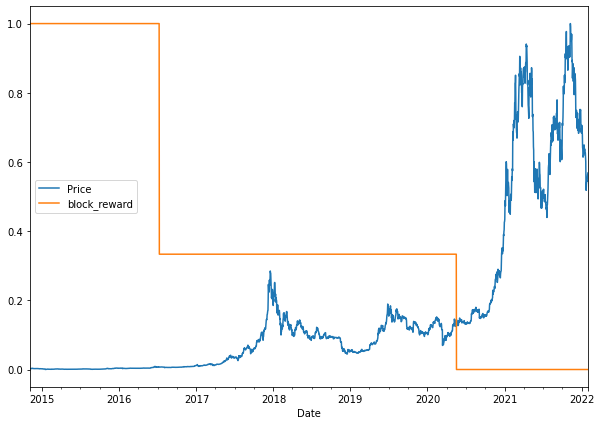

In [101]:
# Plot the block reward/price over time 
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price','block_reward']]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7));

### Making a windowed dataset with pandas

In [102]:
HORIZON = 1
WINDOW_SIZE = 7

In [103]:
# Making a copy of bitcoin historical data with block reward feature 
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns 
for i in range(WINDOW_SIZE): #shift values in each step in window_size
  bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-11-04,324.467934,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,328.644408,25,324.467934,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-06,337.921358,25,328.644408,324.467934,NaN,NaN,NaN,NaN,NaN
2014-11-07,348.992860,25,337.921358,328.644408,324.467934,NaN,NaN,NaN,NaN
2014-11-08,341.459753,25,348.992860,337.921358,328.644408,324.467934,NaN,NaN,NaN
2014-11-09,344.745289,25,341.459753,348.992860,337.921358,328.644408,324.467934,NaN,NaN
2014-11-10,357.239982,25,344.745289,341.459753,348.992860,337.921358,328.644408,324.467934,NaN
2014-11-11,371.116917,25,357.239982,344.745289,341.459753,348.992860,337.921358,328.644408,324.467934
2014-11-12,366.664633,25,371.116917,357.239982,344.745289,341.459753,348.992860,337.921358,328.644408


In [104]:
# Create X & y, remove NaN and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop('Price',axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [105]:
X.head(), y.head()

(            block_reward     Price+1  ...     Price+6     Price+7
 Date                                  ...                        
 2014-11-11          25.0  357.239990  ...  328.644409  324.467926
 2014-11-12          25.0  371.116913  ...  337.921356  328.644409
 2014-11-13          25.0  366.664642  ...  348.992859  337.921356
 2014-11-14          25.0  428.882935  ...  341.459747  348.992859
 2014-11-15          25.0  418.944214  ...  344.745300  341.459747
 
 [5 rows x 8 columns], Date
 2014-11-11    371.116913
 2014-11-12    366.664642
 2014-11-13    428.882935
 2014-11-14    418.944214
 2014-11-15    399.688324
 Name: Price, dtype: float32)

In [106]:
# Make train and test sets 
split_size = int(len(X)*0.8)
X_train,y_train = X[:split_size],y[:split_size]
X_test,y_test = X[split_size:],y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2112, 2112, 528, 528)

In [107]:
# Set random seed
tf.random.set_seed(42)

# 1. Construct model 
model_6 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON, activation='linear') # linear activation = having no activation
], name='model_6_dense_multivariate') # name our model so we can save it

# 2. Compile 
model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])

# 3. Fit the model 
model_6.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
14/17 [=======================>......] - ETA: 0s - loss: 2094.5278 - mae: 2094.5278 - mse: 10107534.0000INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 2s 70ms/step - loss: 1829.5942 - mae: 1829.5942 - mse: 8631165.0000 - val_loss: 3281.0366 - val_mae: 3281.0366 - val_mse: 19249206.0000
Epoch 2/100
14/17 [=======================>......] - ETA: 0s - loss: 483.9695 - mae: 483.9695 - mse: 660074.6250INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 42ms/step - loss: 454.1334 - mae: 454.1334 - mse: 603667.8750 - val_loss: 3102.9265 - val_mae: 3102.9265 - val_mse: 15483128.0000
Epoch 3/100
14/17 [=======================>......] - ETA: 0s - loss: 305.6100 - mae: 305.6100 - mse: 326046.0000INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 40ms/step - loss: 296.4166 - mae: 296.4166 - mse: 309612.4688 - val_loss: 2138.8650 - val_mae: 2138.8650 - val_mse: 8717731.0000
Epoch 4/100
13/17 [=====================>........] - ETA: 0s - loss: 264.3976 - mae: 264.3976 - mse: 273292.3125INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 41ms/step - loss: 260.8640 - mae: 260.8640 - mse: 267498.9375 - val_loss: 2132.6748 - val_mae: 2132.6748 - val_mse: 8755824.0000
Epoch 5/100
15/17 [=========================>....] - ETA: 0s - loss: 254.6253 - mae: 254.6253 - mse: 252923.9688INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 38ms/step - loss: 255.0313 - mae: 255.0313 - mse: 259479.5156 - val_loss: 2075.1331 - val_mae: 2075.1331 - val_mse: 8077144.0000
Epoch 6/100
12/17 [====================>.........] - ETA: 0s - loss: 243.2175 - mae: 243.2175 - mse: 238560.1719INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 41ms/step - loss: 246.5414 - mae: 246.5414 - mse: 245259.6250 - val_loss: 2033.5980 - val_mae: 2033.5980 - val_mse: 7785572.0000
Epoch 7/100
14/17 [=======================>......] - ETA: 0s - loss: 246.7099 - mae: 246.7099 - mse: 242012.5469INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 41ms/step - loss: 241.6188 - mae: 241.6188 - mse: 236052.0625 - val_loss: 1990.8198 - val_mae: 1990.8198 - val_mse: 7577140.5000
Epoch 8/100
14/17 [=======================>......] - ETA: 0s - loss: 231.7834 - mae: 231.7834 - mse: 207979.2344INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 41ms/step - loss: 237.2288 - mae: 237.2288 - mse: 228492.1719 - val_loss: 1947.8702 - val_mae: 1947.8702 - val_mse: 7293215.5000
Epoch 9/100
14/17 [=======================>......] - ETA: 0s - loss: 232.5849 - mae: 232.5849 - mse: 203945.6094INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 41ms/step - loss: 230.9482 - mae: 230.9482 - mse: 216317.3906 - val_loss: 1906.9834 - val_mae: 1906.9834 - val_mse: 7055587.5000
Epoch 10/100
14/17 [=======================>......] - ETA: 0s - loss: 226.5861 - mae: 226.5861 - mse: 206592.7656INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 42ms/step - loss: 225.4801 - mae: 225.4801 - mse: 206569.7500 - val_loss: 1864.0186 - val_mae: 1864.0186 - val_mse: 6459097.0000
Epoch 11/100
17/17 [==============================] - 0s 7ms/step - loss: 220.9677 - mae: 220.9677 - mse: 197370.5625 - val_loss: 1880.2871 - val_mae: 1880.2871 - val_mse: 6935925.5000
Epoch 12/100
13/17 [=====================>........] - ETA: 0s - loss: 222.1037 - mae: 222.1037 - mse: 199806.8906INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 40ms/step - loss: 217.8313 - mae: 217.8313 - mse: 186867.0938 - val_loss: 1807.9327 - val_mae: 1807.9327 - val_mse: 5921714.0000
Epoch 13/100
14/17 [=======================>......] - ETA: 0s - loss: 206.7476 - mae: 206.7476 - mse: 166922.2969INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 39ms/step - loss: 206.5488 - mae: 206.5488 - mse: 173107.2344 - val_loss: 1730.0338 - val_mae: 1730.0338 - val_mse: 5485765.0000
Epoch 14/100
14/17 [=======================>......] - ETA: 0s - loss: 201.5208 - mae: 201.5208 - mse: 163628.2031INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 41ms/step - loss: 200.6974 - mae: 200.6974 - mse: 163580.7812 - val_loss: 1676.8588 - val_mae: 1676.8588 - val_mse: 5157785.5000
Epoch 15/100
14/17 [=======================>......] - ETA: 0s - loss: 196.1805 - mae: 196.1805 - mse: 152557.6562INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 41ms/step - loss: 196.2203 - mae: 196.2203 - mse: 153901.1250 - val_loss: 1546.8563 - val_mae: 1546.8563 - val_mse: 4542903.5000
Epoch 16/100
12/17 [====================>.........] - ETA: 0s - loss: 178.9370 - mae: 178.9370 - mse: 139475.5156INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 41ms/step - loss: 181.7351 - mae: 181.7351 - mse: 138463.6875 - val_loss: 1502.2740 - val_mae: 1502.2740 - val_mse: 4312860.5000
Epoch 17/100
14/17 [=======================>......] - ETA: 0s - loss: 176.9037 - mae: 176.9037 - mse: 131212.4219INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 40ms/step - loss: 175.9947 - mae: 175.9947 - mse: 131512.2500 - val_loss: 1454.9780 - val_mae: 1454.9780 - val_mse: 4118314.2500
Epoch 18/100
17/17 [==============================] - 0s 6ms/step - loss: 171.0530 - mae: 171.0530 - mse: 125697.1719 - val_loss: 1485.8521 - val_mae: 1485.8521 - val_mse: 4490213.5000
Epoch 19/100
12/17 [====================>.........] - ETA: 0s - loss: 169.7666 - mae: 169.7666 - mse: 122196.6875INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 60ms/step - loss: 169.4819 - mae: 169.4819 - mse: 119619.2500 - val_loss: 1393.7655 - val_mae: 1393.7655 - val_mse: 3890694.2500
Epoch 20/100
14/17 [=======================>......] - ETA: 0s - loss: 162.8660 - mae: 162.8660 - mse: 110302.0391INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 39ms/step - loss: 165.7043 - mae: 165.7043 - mse: 117303.4766 - val_loss: 1358.2216 - val_mae: 1358.2216 - val_mse: 3654319.2500
Epoch 21/100
11/17 [==================>...........] - ETA: 0s - loss: 164.2957 - mae: 164.2957 - mse: 123388.6953INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 44ms/step - loss: 163.4318 - mae: 163.4318 - mse: 114561.1797 - val_loss: 1352.3558 - val_mae: 1352.3558 - val_mse: 3706265.0000
Epoch 22/100
14/17 [=======================>......] - ETA: 0s - loss: 159.9102 - mae: 159.9102 - mse: 112116.3281INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 42ms/step - loss: 158.0001 - mae: 158.0001 - mse: 110552.2734 - val_loss: 1330.1490 - val_mae: 1330.1490 - val_mse: 3589329.7500
Epoch 23/100
14/17 [=======================>......] - ETA: 0s - loss: 158.4447 - mae: 158.4447 - mse: 99067.8516 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 39ms/step - loss: 159.5362 - mae: 159.5362 - mse: 107061.6797 - val_loss: 1318.3857 - val_mae: 1318.3857 - val_mse: 3530493.0000
Epoch 24/100
11/17 [==================>...........] - ETA: 0s - loss: 164.1337 - mae: 164.1337 - mse: 116846.2031INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 41ms/step - loss: 158.1135 - mae: 158.1135 - mse: 109935.9609 - val_loss: 1285.0643 - val_mae: 1285.0643 - val_mse: 3293705.0000
Epoch 25/100
17/17 [==============================] - 0s 6ms/step - loss: 154.2873 - mae: 154.2873 - mse: 103758.2422 - val_loss: 1303.8577 - val_mae: 1303.8577 - val_mse: 3290098.0000
Epoch 26/100
17/17 [==============================] - 0s 7ms/step - loss: 150.2770 - mae: 150.2770 - mse: 101060.5000 - val_loss: 1326.2098 - val_mae: 1326.2098 - val_mse: 3355420.5000
Epoch 27/100
14/17 [=======================>......] - ETA: 0s - loss: 153.6877 - mae: 153.6877 - mse: 104985.6719INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 40ms/step - loss: 152.9532 - mae: 152.9532 - mse: 104508.6797 - val_loss: 1253.7869 - val_mae: 1253.7869 - val_mse: 3128482.2500
Epoch 28/100
14/17 [=======================>......] - ETA: 0s - loss: 148.6239 - mae: 148.6239 - mse: 100258.1875INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 43ms/step - loss: 149.2376 - mae: 149.2376 - mse: 98288.0000 - val_loss: 1239.5317 - val_mae: 1239.5317 - val_mse: 3094948.0000
Epoch 29/100
17/17 [==============================] - 0s 7ms/step - loss: 147.2564 - mae: 147.2564 - mse: 96822.1484 - val_loss: 1256.0917 - val_mae: 1256.0917 - val_mse: 3102582.0000
Epoch 30/100
14/17 [=======================>......] - ETA: 0s - loss: 146.4195 - mae: 146.4195 - mse: 98812.9297INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 40ms/step - loss: 144.7399 - mae: 144.7399 - mse: 94826.8906 - val_loss: 1224.5476 - val_mae: 1224.5476 - val_mse: 3045897.2500
Epoch 31/100
11/17 [==================>...........] - ETA: 0s - loss: 136.4141 - mae: 136.4141 - mse: 79263.8828INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 40ms/step - loss: 143.8565 - mae: 143.8565 - mse: 94308.2656 - val_loss: 1217.8584 - val_mae: 1217.8584 - val_mse: 3025807.0000
Epoch 32/100
13/17 [=====================>........] - ETA: 0s - loss: 144.5556 - mae: 144.5556 - mse: 97655.6719 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 41ms/step - loss: 143.7237 - mae: 143.7237 - mse: 94280.5938 - val_loss: 1212.6442 - val_mae: 1212.6442 - val_mse: 3009231.0000
Epoch 33/100
17/17 [==============================] - 0s 6ms/step - loss: 147.0470 - mae: 147.0470 - mse: 96282.2891 - val_loss: 1252.9575 - val_mae: 1252.9575 - val_mse: 3247652.7500
Epoch 34/100
17/17 [==============================] - 0s 7ms/step - loss: 142.9309 - mae: 142.9309 - mse: 92192.2812 - val_loss: 1223.3248 - val_mae: 1223.3248 - val_mse: 2984772.7500
Epoch 35/100
14/17 [=======================>......] - ETA: 0s - loss: 141.1771 - mae: 141.1771 - mse: 94254.9141INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 40ms/step - loss: 140.2972 - mae: 140.2972 - mse: 90921.3594 - val_loss: 1198.6124 - val_mae: 1198.6124 - val_mse: 2958172.5000
Epoch 36/100
17/17 [==============================] - 0s 6ms/step - loss: 142.9548 - mae: 142.9548 - mse: 91383.6406 - val_loss: 1210.5597 - val_mae: 1210.5597 - val_mse: 3051069.2500
Epoch 37/100
17/17 [==============================] - 0s 6ms/step - loss: 141.7421 - mae: 141.7421 - mse: 91569.7578 - val_loss: 1199.7590 - val_mae: 1199.7590 - val_mse: 2920278.2500
Epoch 38/100
13/17 [=====================>........] - ETA: 0s - loss: 145.5548 - mae: 145.5548 - mse: 98105.0391INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 37ms/step - loss: 143.1095 - mae: 143.1095 - mse: 90757.8281 - val_loss: 1186.9493 - val_mae: 1186.9493 - val_mse: 2907198.7500
Epoch 39/100
17/17 [==============================] - 0s 7ms/step - loss: 145.9491 - mae: 145.9491 - mse: 94337.3750 - val_loss: 1193.1539 - val_mae: 1193.1539 - val_mse: 2896007.5000
Epoch 40/100
17/17 [==============================] - 0s 6ms/step - loss: 145.5606 - mae: 145.5606 - mse: 92163.8594 - val_loss: 1226.5701 - val_mae: 1226.5701 - val_mse: 2976040.7500
Epoch 41/100
15/17 [=========================>....] - ETA: 0s - loss: 137.7639 - mae: 137.7639 - mse: 84903.9062INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 39ms/step - loss: 139.6201 - mae: 139.6201 - mse: 89581.9766 - val_loss: 1178.6608 - val_mae: 1178.6608 - val_mse: 2903851.2500
Epoch 42/100
17/17 [==============================] - 0s 7ms/step - loss: 141.7826 - mae: 141.7826 - mse: 90771.8281 - val_loss: 1252.4651 - val_mae: 1252.4651 - val_mse: 3226789.0000
Epoch 43/100
17/17 [==============================] - 0s 7ms/step - loss: 162.2610 - mae: 162.2610 - mse: 104616.5781 - val_loss: 1457.0430 - val_mae: 1457.0430 - val_mse: 4121166.5000
Epoch 44/100
17/17 [==============================] - 0s 7ms/step - loss: 157.5330 - mae: 157.5330 - mse: 98615.4297 - val_loss: 1428.8518 - val_mae: 1428.8518 - val_mse: 3990135.5000
Epoch 45/100
14/17 [=======================>......] - ETA: 0s - loss: 144.3077 - mae: 144.3077 - mse: 93177.8359INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 40ms/step - loss: 145.0934 - mae: 145.0934 - mse: 92105.8438 - val_loss: 1171.0973 - val_mae: 1171.0973 - val_mse: 2883373.2500
Epoch 46/100
14/17 [=======================>......] - ETA: 0s - loss: 137.3049 - mae: 137.3049 - mse: 89347.2344INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 43ms/step - loss: 137.3846 - mae: 137.3846 - mse: 86647.1797 - val_loss: 1168.0027 - val_mae: 1168.0027 - val_mse: 2843205.7500
Epoch 47/100
13/17 [=====================>........] - ETA: 0s - loss: 129.7664 - mae: 129.7664 - mse: 74832.7969INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 41ms/step - loss: 135.7229 - mae: 135.7229 - mse: 86121.9141 - val_loss: 1167.6198 - val_mae: 1167.6198 - val_mse: 2834088.2500
Epoch 48/100
14/17 [=======================>......] - ETA: 0s - loss: 138.6466 - mae: 138.6466 - mse: 91005.1172 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 39ms/step - loss: 136.6376 - mae: 136.6376 - mse: 86444.3672 - val_loss: 1163.3138 - val_mae: 1163.3138 - val_mse: 2831913.5000
Epoch 49/100
13/17 [=====================>........] - ETA: 0s - loss: 132.8063 - mae: 132.8063 - mse: 82337.3828 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 58ms/step - loss: 136.8139 - mae: 136.8139 - mse: 86825.7500 - val_loss: 1160.9250 - val_mae: 1160.9250 - val_mse: 2834993.7500
Epoch 50/100
17/17 [==============================] - 0s 6ms/step - loss: 135.8520 - mae: 135.8520 - mse: 86429.9141 - val_loss: 1198.8091 - val_mae: 1198.8091 - val_mse: 2886814.2500
Epoch 51/100
17/17 [==============================] - 0s 7ms/step - loss: 143.1935 - mae: 143.1935 - mse: 90944.8359 - val_loss: 1219.4651 - val_mae: 1219.4651 - val_mse: 3077288.0000
Epoch 52/100
17/17 [==============================] - 0s 7ms/step - loss: 140.5501 - mae: 140.5501 - mse: 87597.8828 - val_loss: 1175.3649 - val_mae: 1175.3649 - val_mse: 2826577.2500
Epoch 53/100
17/17 [==============================] - 0s 7ms/step - loss: 145.1243 - mae: 145.1243 - mse: 91145.9688 - val_loss: 1280.9670 - val_mae: 1280.9670 - val_mse: 3144670.5000
Epoch 54/100
14/17 [=======================>......] - ETA: 0s - loss: 148.9160 - mae: 148.91

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 40ms/step - loss: 144.7005 - mae: 144.7005 - mse: 90349.4531 - val_loss: 1154.8325 - val_mae: 1154.8325 - val_mse: 2799748.5000
Epoch 55/100
17/17 [==============================] - 0s 7ms/step - loss: 134.5116 - mae: 134.5116 - mse: 83545.7344 - val_loss: 1171.9712 - val_mae: 1171.9712 - val_mse: 2895474.2500
Epoch 56/100
17/17 [==============================] - 0s 7ms/step - loss: 134.5631 - mae: 134.5631 - mse: 84459.4922 - val_loss: 1199.9087 - val_mae: 1199.9087 - val_mse: 2996250.0000
Epoch 57/100
17/17 [==============================] - 0s 6ms/step - loss: 136.2761 - mae: 136.2761 - mse: 84791.8047 - val_loss: 1156.6844 - val_mae: 1156.6844 - val_mse: 2789865.2500
Epoch 58/100
17/17 [==============================] - 0s 6ms/step - loss: 135.5323 - mae: 135.5323 - mse: 84951.9297 - val_loss: 1172.4745 - val_mae: 1172.4745 - val_mse: 2816265.7500
Epoch 59/100
14/17 [=======================>......] - ETA: 0s - loss: 137.3261 - mae: 137.32

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 42ms/step - loss: 134.6049 - mae: 134.6049 - mse: 83600.3750 - val_loss: 1147.7737 - val_mae: 1147.7737 - val_mse: 2789090.7500
Epoch 60/100
17/17 [==============================] - 0s 7ms/step - loss: 133.5837 - mae: 133.5837 - mse: 83754.7656 - val_loss: 1208.7281 - val_mae: 1208.7281 - val_mse: 2914995.5000
Epoch 61/100
17/17 [==============================] - 0s 7ms/step - loss: 134.7735 - mae: 134.7735 - mse: 84112.0703 - val_loss: 1161.5176 - val_mae: 1161.5176 - val_mse: 2791686.5000
Epoch 62/100
17/17 [==============================] - 0s 7ms/step - loss: 134.9668 - mae: 134.9668 - mse: 84364.4375 - val_loss: 1159.6198 - val_mae: 1159.6198 - val_mse: 2844559.0000
Epoch 63/100
17/17 [==============================] - 0s 7ms/step - loss: 135.7695 - mae: 135.7695 - mse: 84456.0156 - val_loss: 1164.9309 - val_mae: 1164.9309 - val_mse: 2798095.0000
Epoch 64/100
14/17 [=======================>......] - ETA: 0s - loss: 135.2801 - mae: 135.28

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 42ms/step - loss: 134.1754 - mae: 134.1754 - mse: 83419.3281 - val_loss: 1144.8662 - val_mae: 1144.8662 - val_mse: 2782862.2500
Epoch 65/100
17/17 [==============================] - 0s 6ms/step - loss: 134.8345 - mae: 134.8345 - mse: 84361.4375 - val_loss: 1155.5308 - val_mae: 1155.5308 - val_mse: 2827213.7500
Epoch 66/100
17/17 [==============================] - 0s 6ms/step - loss: 135.1415 - mae: 135.1415 - mse: 84422.1562 - val_loss: 1162.9030 - val_mae: 1162.9030 - val_mse: 2853173.0000
Epoch 67/100
17/17 [==============================] - 0s 7ms/step - loss: 134.0668 - mae: 134.0668 - mse: 84170.0859 - val_loss: 1152.3213 - val_mae: 1152.3213 - val_mse: 2813625.7500
Epoch 68/100
17/17 [==============================] - 0s 6ms/step - loss: 136.3235 - mae: 136.3235 - mse: 83507.7266 - val_loss: 1147.2397 - val_mae: 1147.2397 - val_mse: 2793312.2500
Epoch 69/100
17/17 [==============================] - 0s 7ms/step - loss: 141.0451 - mae: 14

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 40ms/step - loss: 134.1665 - mae: 134.1665 - mse: 83030.6016 - val_loss: 1141.5675 - val_mae: 1141.5675 - val_mse: 2765059.5000
Epoch 75/100
17/17 [==============================] - 0s 7ms/step - loss: 136.4915 - mae: 136.4915 - mse: 85093.4062 - val_loss: 1158.7034 - val_mae: 1158.7034 - val_mse: 2780186.7500
Epoch 76/100
17/17 [==============================] - 0s 7ms/step - loss: 134.8821 - mae: 134.8821 - mse: 83294.1875 - val_loss: 1148.2572 - val_mae: 1148.2572 - val_mse: 2795437.2500
Epoch 77/100
17/17 [==============================] - 0s 7ms/step - loss: 135.3849 - mae: 135.3849 - mse: 84723.7891 - val_loss: 1254.4679 - val_mae: 1254.4679 - val_mse: 3059977.5000
Epoch 78/100
17/17 [==============================] - 0s 6ms/step - loss: 137.2141 - mae: 137.2141 - mse: 84941.1172 - val_loss: 1177.1434 - val_mae: 1177.1434 - val_mse: 2823784.2500
Epoch 79/100
17/17 [==============================] - 0s 7ms/step - loss: 138.8689 - mae: 13

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


17/17 [==============================] - 1s 40ms/step - loss: 139.0860 - mae: 139.0860 - mse: 87280.3125 - val_loss: 1139.6665 - val_mae: 1139.6665 - val_mse: 2739723.0000
Epoch 91/100
17/17 [==============================] - 0s 6ms/step - loss: 132.1217 - mae: 132.1217 - mse: 81429.4688 - val_loss: 1164.5909 - val_mae: 1164.5909 - val_mse: 2845647.5000
Epoch 92/100
17/17 [==============================] - 0s 6ms/step - loss: 137.1060 - mae: 137.1060 - mse: 83642.0547 - val_loss: 1143.9310 - val_mae: 1143.9310 - val_mse: 2744289.0000
Epoch 93/100
17/17 [==============================] - 0s 6ms/step - loss: 137.0139 - mae: 137.0139 - mse: 84246.6875 - val_loss: 1170.2612 - val_mae: 1170.2612 - val_mse: 2865005.0000
Epoch 94/100
17/17 [==============================] - 0s 7ms/step - loss: 137.8542 - mae: 137.8542 - mse: 83216.0391 - val_loss: 1140.1545 - val_mae: 1140.1545 - val_mse: 2738278.7500
Epoch 95/100
17/17 [==============================] - 0s 6ms/step - loss: 133.2703 - mae: 13

In [108]:
model_6.evaluate(X_test, y_test)

17/17 [==============================] - 0s 4ms/step - loss: 1165.9991 - mae: 1165.9991 - mse: 2789626.2500


[1165.9991455078125, 1165.9991455078125, 2789626.25]

In [109]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model('model_experiments/model_6_dense_multivariate')
model_6.evaluate(X_test, y_test)

17/17 [==============================] - 0s 4ms/step - loss: 1139.6665 - mae: 1139.6665 - mse: 2739723.2500


[1139.66650390625, 1139.66650390625, 2739723.25]

In [110]:
# Make predictions with multivariate model 
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([11570.741, 11615.482, 11671.395, 11739.338, 11397.031, 11441.752,
       11354.593, 11483.193, 11491.074, 11691.512], dtype=float32)>

In [111]:
# Evaluate predictions to get eval metrics 
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred = model_6_preds)
model_6_results

{'mae': 1139.6665,
 'mape': 2.8485818,
 'mase': 1.0082337,
 'mse': 2739723.2,
 'rmse': 1655.2109}

In [112]:
model_1_results

{'mae': 1140.2012,
 'mape': 2.8472457,
 'mase': 1.0087067,
 'mse': 2764825.8,
 'rmse': 1662.7765}

In [113]:
naive_results

{'mae': 1127.0099,
 'mape': 2.8232758,
 'mase': 0.99867827,
 'mse': 2704483.5,
 'rmse': 1644.5315}

In [114]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor [(def __init__(...))] takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers
    # In the constructor, the block architecture layers created: 
    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

### Preparing data for the N-Beats algorithm using `tf.data`


In [115]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [116]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-11-11,371.116917,357.239982,344.745289,341.459753,348.992860,337.921358,328.644408,324.467934
2014-11-12,366.664633,371.116917,357.239982,344.745289,341.459753,348.992860,337.921358,328.644408
2014-11-13,428.882925,366.664633,371.116917,357.239982,344.745289,341.459753,348.992860,337.921358
2014-11-14,418.944218,428.882925,366.664633,371.116917,357.239982,344.745289,341.459753,348.992860
2014-11-15,399.688315,418.944218,428.882925,366.664633,371.116917,357.239982,344.745289,341.459753


In [117]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2112, 2112, 528, 528)

In [118]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [119]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [120]:
%%time

tf.random.set_seed(42)

#1. Setup N-BEATS Block Layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='InitialBlock')

#2. Create input to stacks (input node)
stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input') 

#3. Create initial backast and forecast input 
backcast, forecast = nbeats_block_layer(stack_input)

# Add in subtraction residual 
residuals = layers.subtract([stack_input, backcast], name=f'subtract_00')

#4. Create stacks of blocks 
for i, _ in enumerate(range(N_STACKS-1)): #-1 bcs first stack is already created in3
  #5. 
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f'NBeatsBlock_{i}'
  )(residuals)
  #6. Create the double residual stacking 
  residuals = layers.subtract([residuals, backcast], name=f'subtract_{i}')
  forecast = layers.add([forecast, block_forecast], name=f'add_{i}')

#7. Put the stack model together 
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast,
                         name='model_7_N-BEATS')

#8. Compile with MAE loss and Adam Optimizer
model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae','mse'])

#9. Fit the model with EarlyStopping and ReduceLRonPlateau callbacks 
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 196: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 306: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 406: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 2min 26s, sys: 3.46 s, total: 2min 30s
Wall time: 3min 22s


In [121]:
# Evaluate 
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 49ms/step - loss: 1180.1542 - mae: 1180.1542 - mse: 2880262.5000


[1180.1541748046875, 1180.1541748046875, 2880262.5]

In [122]:
# Make predictions 
model_7_preds = make_preds(model_7, test_dataset)

In [123]:
# Evaluate
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results 

{'mae': 1180.1542,
 'mape': 2.9624996,
 'mase': 1.0440521,
 'mse': 2880262.5,
 'rmse': 1697.1338}

In [124]:
naive_results

{'mae': 1127.0099,
 'mape': 2.8232758,
 'mase': 0.99867827,
 'mse': 2704483.5,
 'rmse': 1644.5315}

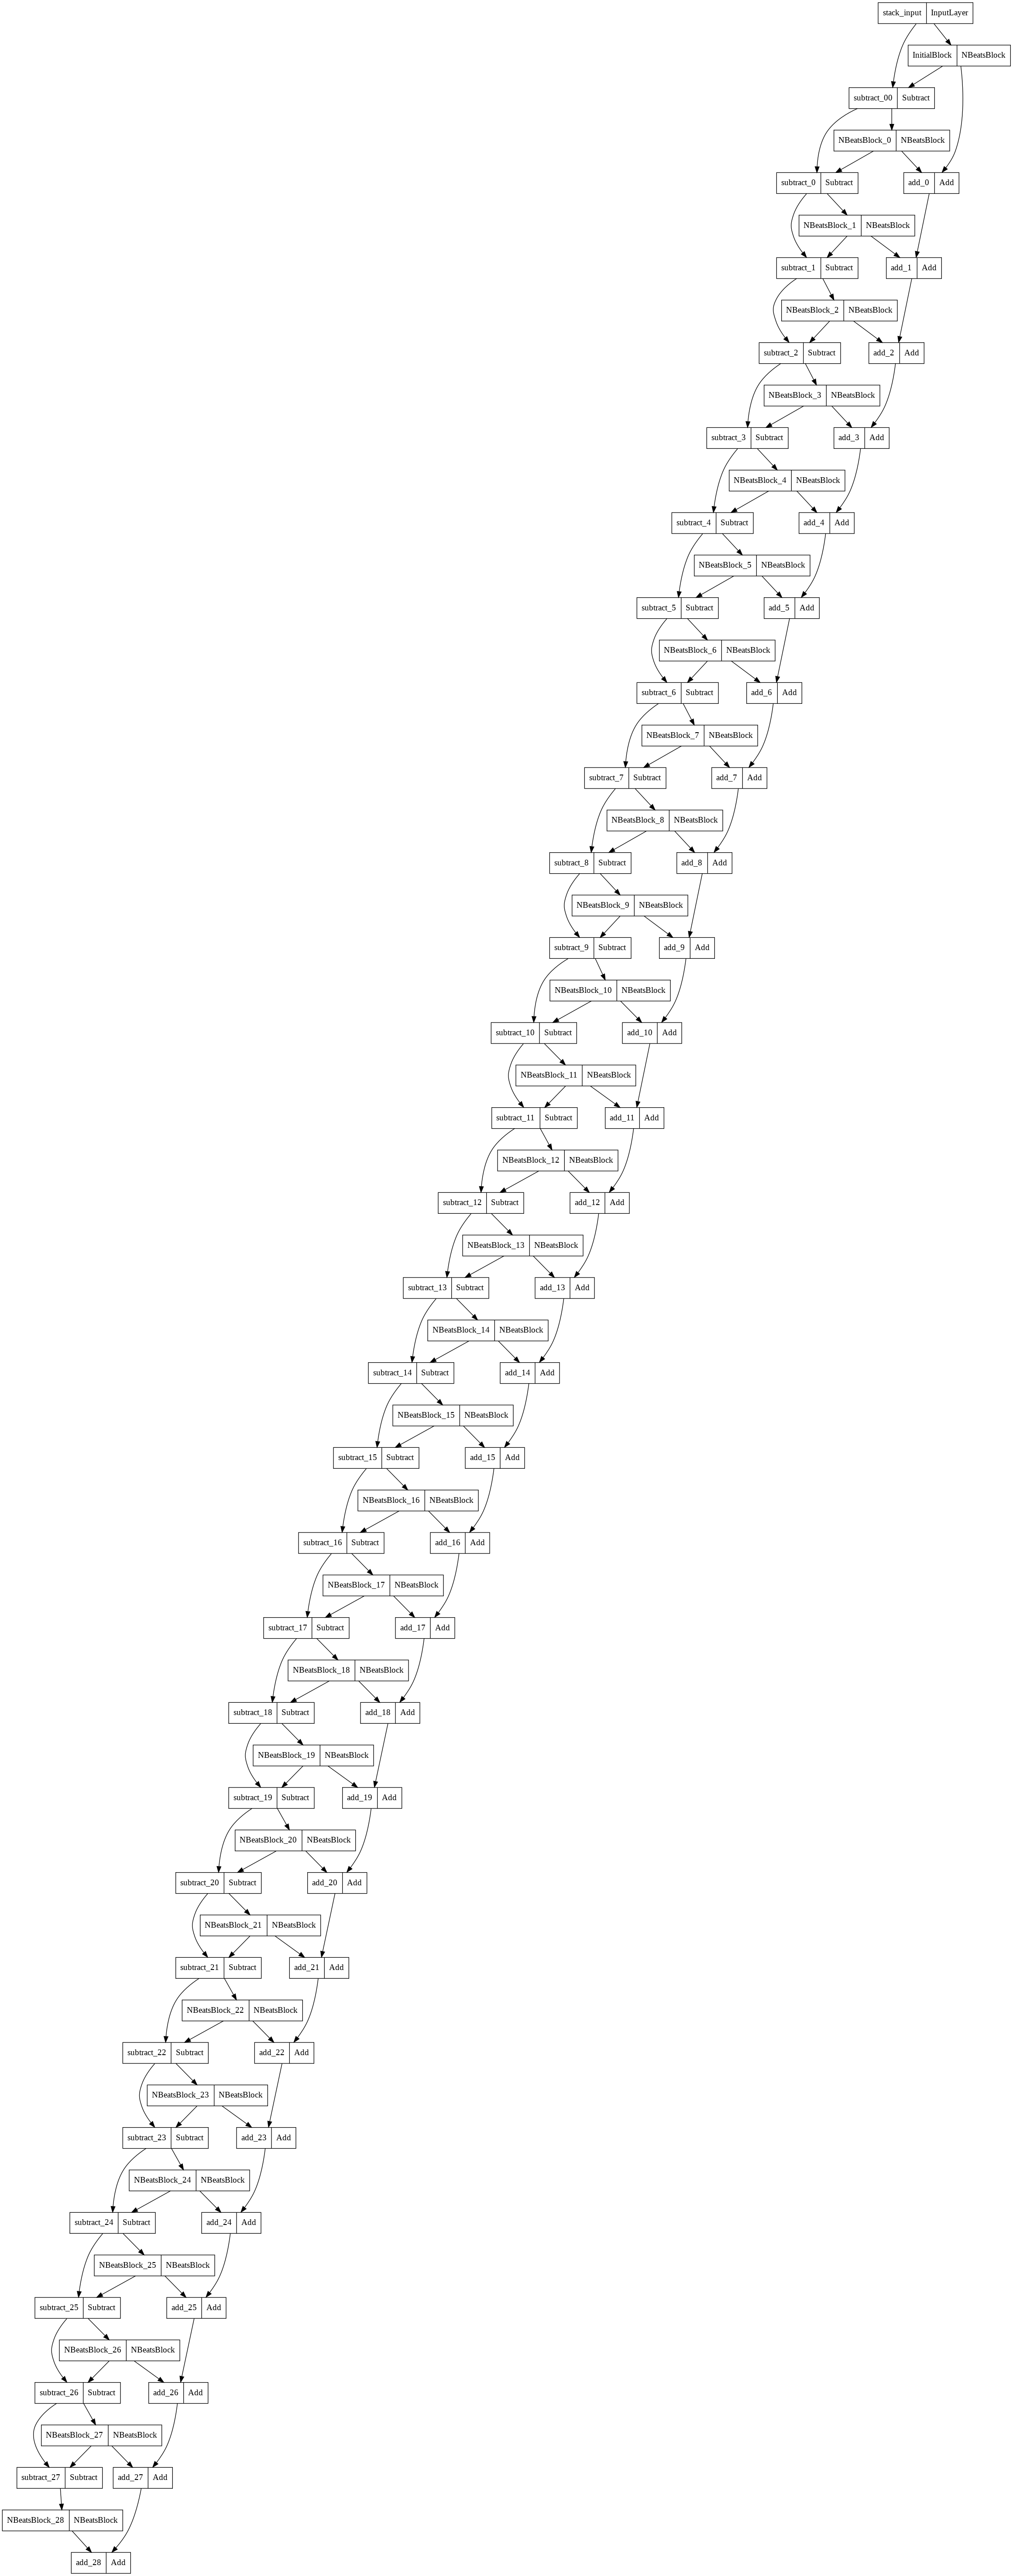

In [125]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble(stacking different models together)

> The benefit of ensembling models is you get the "decision of the crowd effect". Rather than relying on a single model's predictions, you can take the average or median of many different models.

`Deep learning models with the same architecture can produce different results, due to their random initialization(weights and biases)`

Here we can try to use : 

1.   Different loss functions (mae, mse,mape)
2.   Randomly initialized models 

`We'll be creating a suite of different models all attempting to model the same data`

### 1. Contructing and fitting an ensemble of models (using different loss functions)

In [126]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae","mse","mape"]):
  """ 
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
  """
  # Make empty list for trained ensemble models
  ensemble_models = []
  
  # Create num_iter number of models per loss function 
  for i in range(num_iter):
    #Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f'Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}')
    
    # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
                                 layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
                                 layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
                                 layers.Dense(HORIZON)
                                 
      ])

    # Compile simple model with current loss function
      model.compile(loss=loss_function,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mae','mse'])
    # Fit model 
      model.fit(train_data,
              epochs=num_epochs,
              verbose=0,
              validation_data=test_data,
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=20,
                                                          restore_best_weights=True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor='vall_loss',
                                                              patience=100,
                                                              verbose=1)])
    # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [127]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0


Optimizing model by reducing: mse for 1000 epochs, model number: 0


Optimizing model by reducing: mape for 1000 epochs, model number: 0


Optimizing model by reducing: mae for 1000 epochs, model number: 1


Optimizing model by reducing: mse for 1000 epochs, model number: 1


Optimizing model by reducing: mape for 1000 epochs, model number: 1


Optimizing model by reducing: mae for 1000 epochs, model number: 2


Optimizing model by reducing: mse for 1000 epochs, model number: 2


Optimizing model by reducing: mape for 1000 epochs, model number: 2


Optimizing model by reducing: mae for 1000 epochs, model number: 3


Optimizing model by reducing: mse for 1000 epochs, model number: 3


Optimizing model by reducing: mape for 1000 epochs, model number: 3


Optimizing model by reducing: mae for 1000 epochs, model number: 4


Optimizing model by reducing: mse for 1000 epochs, model number: 4


Optimizing model by reducing: mape for 1000 epochs, model number: 4


CPU times: user 3min 3s, sys: 14.4 s, total: 3min 18s
Wall time: 4min 14s


### Making predictions with an ensemble model 

In [128]:
# Create a function which uses a list of trained models to make and return a list of predict
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [129]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 528), dtype=float32, numpy=
array([[11825.581, 11829.57 , 11820.383, ..., 38104.35 , 38051.21 ,
        37865.94 ],
       [12023.026, 11559.07 , 11328.829, ..., 36709.43 , 36790.016,
        36856.36 ],
       [11658.287, 11577.375, 11776.839, ..., 38011.938, 38429.273,
        38312.688],
       ...,
       [11686.972, 11590.704, 11735.126, ..., 37503.543, 38014.61 ,
        38139.867],
       [11597.579, 11534.68 , 11607.85 , ..., 37825.734, 38325.1  ,
        38067.406],
       [11913.936, 12183.989, 11568.213, ..., 38524.16 , 38943.324,
        38759.766]], dtype=float32)>

In [130]:
np.median(ensemble_preds, axis=1)

array([42078.32 , 41022.33 , 41747.934, 42644.633, 41516.43 , 41993.062,
       41672.625, 41497.723, 41940.72 , 41746.625, 41687.86 , 41901.883,
       41983.883, 41663.555, 41941.188], dtype=float32)

In [131]:
np.median(ensemble_preds, axis=0)

array([11665.209 , 11705.669 , 11667.264 , 11833.107 , 11416.103 ,
       11454.284 , 11370.36  , 11581.059 , 11533.818 , 11761.145 ,
       11680.345 , 11942.87  , 11480.775 , 10480.224 , 10340.155 ,
       10245.563 , 10351.517 , 10304.106 , 10231.543 , 10230.6045,
       10347.626 , 10420.527 , 10456.697 , 10376.889 , 10680.768 ,
       10763.611 , 10944.563 , 10953.053 , 10985.747 , 11095.847 ,
       10989.875 , 10502.767 , 10530.589 , 10287.402 , 10744.026 ,
       10707.886 , 10841.87  , 10789.201 , 10773.905 , 10854.26  ,
       10823.112 , 10687.099 , 10594.302 , 10604.602 , 10697.194 ,
       10821.137 , 10670.796 , 10696.147 , 10936.535 , 11061.287 ,
       11272.833 , 11384.502 , 11568.832 , 11477.5205, 11483.243 ,
       11536.849 , 11413.607 , 11389.057 , 11525.515 , 11768.83  ,
       11900.054 , 12667.6875, 13033.724 , 13054.105 , 13157.474 ,
       13150.4375, 13100.222 , 13602.926 , 13395.312 , 13455.534 ,
       13565.824 , 13846.459 , 13799.022 , 13662.26  , 14011.7

> since we've trained (5x3)15 models, there's going to be 15 sets of predictions. Rather than comparing every set of predictions to the ground truth, let's take the median (you could also take the mean too but the median is usually more robust than the mean).

In [132]:
# Evaluate ensemble models predictions 
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds,axis=0)) # take the mdeidan across all ensemble predictions
ensemble_results

{'mae': 1157.8293,
 'mape': 2.8917723,
 'mase': 1.0243019,
 'mse': 2824341.8,
 'rmse': 1680.5778}

In [133]:
naive_results

{'mae': 1127.0099,
 'mape': 2.8232758,
 'mase': 0.99867827,
 'mse': 2704483.5,
 'rmse': 1644.5315}

### Plotting the prediction interbals (uncertainty estimates) of our ensemble 

In [134]:
# Find upper and lower bounds of ensemble predictions 
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standart deviation of the predictions 
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standart deviation by 1.96
  interval = 1.96 * std 

  # 4. Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval 
  return lower, upper 

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)



In [135]:
tf.math.reduce_std(ensemble_preds, axis=0)

<tf.Tensor: shape=(528,), dtype=float32, numpy=
array([ 166.14168 ,  179.44348 ,  213.15355 ,   95.224724,  151.07425 ,
        114.25877 ,  154.92146 ,  104.488525,  193.22963 ,  137.47014 ,
        132.2471  ,  131.4168  ,  106.428185,  380.41312 ,  409.99673 ,
        413.29675 ,  279.04178 ,  398.2077  ,  225.02237 ,  131.15863 ,
        139.67465 ,  104.274055,  144.04105 ,   71.398605,  111.6122  ,
        139.31598 ,  179.10368 ,  150.62383 ,   92.55482 ,  105.57135 ,
         62.911373,  149.52359 ,  167.53479 ,  217.45813 ,  174.854   ,
        266.5802  ,  143.11551 ,  151.88951 ,   83.29717 ,  141.94926 ,
         83.99964 ,   68.388695,   96.164505,   94.97225 ,  113.81211 ,
        146.1616  ,   88.8808  ,   73.501945,  112.75139 ,  145.22182 ,
        217.38295 ,  175.09251 ,  160.99327 ,  111.510155,   79.182915,
         78.07533 ,   71.05775 ,   99.45493 ,  123.19993 ,  142.36792 ,
        203.94067 ,  350.474   ,  362.84055 ,  291.20505 ,  227.97533 ,
        156.7678

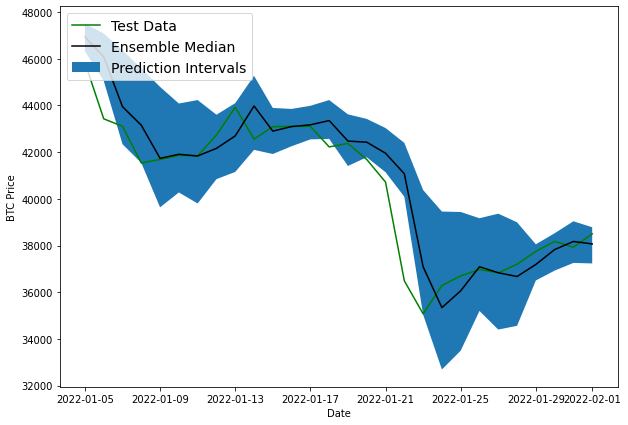

In [136]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset = 500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label='Test Data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label='Ensemble Median')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],label='Prediction Intervals')
plt.legend(loc='upper left', fontsize=14);

## Making predictions on the future 

> For time series forecast, we have to retain a model every time we make a prediction(as new data comes in, retain a model and make a prediction)

In [137]:
# Train model on entire data to make prediction for the next day 
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [138]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [139]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [143]:
INTO_FUTURE = 14 # How many timesteps to predict into the future?

In [144]:
#1. Create function to make predictions into the future 
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE):
  """
  Makes future forecasts into_future steps after values ends.
  Returns future forecasts as list of floats.
  """
  #2. Make an empty list for future forecast and prepare data to forecast on
  future_forecast = []
  # extracts the last WINDOW_SIZE values from the input values (predictions will start from the last WINDOW_SIZE values of the training data)
  # the window size a model was traines on. the model can only predict on the same kind of data it was trained on
  last_window = values[-WINDOW_SIZE:] #Only want preds from the last window(this will get update)
  #3. Make into_future number of predictions
  for _ in range(into_future):
    #Predict on last window then append it again, again,again
    future_pred = model.predict(tf.expand_dims(last_window,axis=0))
    print(f'Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n')

    #Apppend predictions to future_forecast 
    future_forecast.append(tf.squeeze(future_pred).numpy())

    #Update last window with new pred and get WINDOW_SIZE most recent preds
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [145]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Predicting on: 
 [36971.571269 36827.674589 37197.821249 37748.36     38176.097725
 37928.575488 38499.876388] -> Prediction: 36745.85546875

Predicting on: 
 [36827.674589   37197.821249   37748.36       38176.097725
 37928.575488   38499.876388   36745.85546875] -> Prediction: 37173.51953125

Predicting on: 
 [37197.821249   37748.36       38176.097725   37928.575488
 38499.876388   36745.85546875 37173.51953125] -> Prediction: 37397.87109375

Predicting on: 
 [37748.36       38176.097725   37928.575488   38499.876388
 36745.85546875 37173.51953125 37397.87109375] -> Prediction: 38063.4140625

Predicting on: 
 [38176.097725   37928.575488   38499.876388   36745.85546875
 37173.51953125 37397.87109375 38063.4140625 ] -> Prediction: 37827.89453125

Predicting on: 
 [37928.575488   38499.876388   36745.85546875 37173.51953125
 37397.87109375 38063.4140625  37827.89453125] -> Prediction: 38000.515625

Predicting on: 
 [38499.876388   36745.85546875 37173.51953125 37397.87109375
 38063.41

In [146]:
future_forecast[:10]

[36745.855,
 37173.52,
 37397.87,
 38063.414,
 37827.895,
 38000.516,
 37518.883,
 36978.58,
 37312.996,
 37698.957]

In [147]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.
  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, 'D' stands for day 
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date 
  return np.arange(start_date, end_date, dtype='datetime64[D]') # return a date range between start date and end date 

In [148]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2022-02-01 00:00:00')

In [149]:
next_time_steps =  get_future_dates(start_date=last_timestep,
                                    into_future=INTO_FUTURE)
next_time_steps

array(['2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
       '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
       '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
       '2022-02-14', '2022-02-15'], dtype='datetime64[D]')

In [150]:
# Insert last timestep/final price so the graph doesnt look messe
next_time_steps = np.insert(next_time_steps, 0, last_timestep) #(array,indexnya mau dimana,values)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

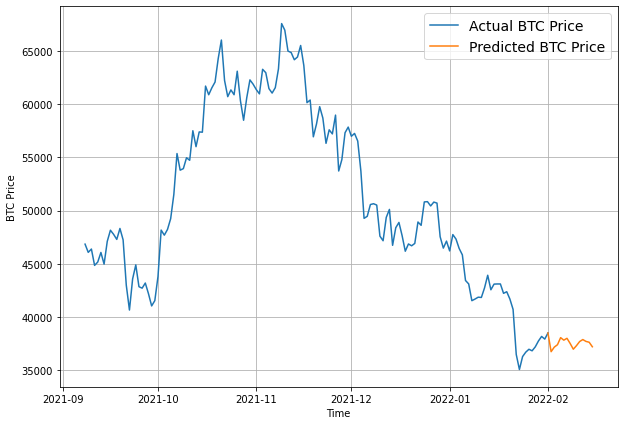

In [151]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Compare Models 

In [152]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,1127.009888,2704483.50,1644.531494,2.823276,0.998678
model_1_dense_w7_h1,1140.201172,2764825.75,1662.776489,2.847246,1.008707
model_2_dense_w30_h1,1233.389771,3079271.75,1754.785522,3.085911,1.084139
model_3_dense_w30_h7,2419.106689,11996798.00,2770.479492,6.062185,2.125433
model_4_CONV1D,1144.036255,2792920.00,1671.203125,2.851182,1.012100
model_5_LSTM,1187.783813,2923671.50,1709.874756,2.962411,1.050802
model_6_multivariate,1139.666504,2739723.25,1655.210938,2.848582,1.008234
model_8_NBEATs,1180.154175,2880262.50,1697.133789,2.962500,1.044052
model_9_ensemble,1157.829346,2824341.75,1680.577759,2.891772,1.024302


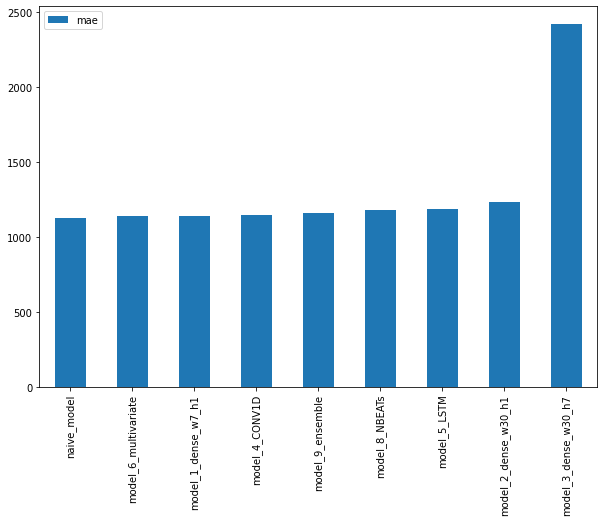

In [153]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");